## Getting the necessary libraries and inserting the data into a dataframe

In [203]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from scipy.stats import zscore
from decimal import Decimal

In [204]:
data = pd.read_csv("data.csv")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## An initial view at the data

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

### See the first and last instances of the dataframe

In [206]:
data.head(5)

Entity Continent  Latitude  Longitude  Average temperature per year  \
0  Albania    Europe  41.15000   20.17000                            14   
1  Albania    Europe  41.15000   20.17000                            14   
2  Albania    Europe  41.15000   20.17000                            14   
3  Albania    Europe  41.15000   20.17000                            14   
4  Albania    Europe  41.15000   20.17000                            14   

   Hospital beds per 1000 people  Medical doctors per 1000 people  GDP/Capita  \
0                        2.89000                          1.29000  5353.20000   
1                        2.89000                          1.29000  5353.20000   
2                        2.89000                          1.29000  5353.20000   
3                        2.89000                          1.29000  5353.20000   
4                        2.89000                          1.29000  5353.20000   

   Population  Median age  Population aged 65 and over (%)        Date  \
0     2873457          38                               14  2020-02-25   
1     2873457          38                               14  2020-02-26   
2     2873457          38                               14  2020-02-27   
3     2873457          38                               14  2020-02-28   
4     2873457          38                               14  2020-02-29   

   Daily tests  Cases  Deaths  
0      8.00000    NaN     NaN  
1      5.00000    NaN     NaN  
2      4.00000    NaN     NaN  
3      1.00000    NaN     NaN  
4      8.00000    NaN     NaN

In [207]:
data.tail(5)

Entity Continent  Latitude  Longitude  Average temperature per year  \
38467  Zimbabwe    Africa -19.02000   29.15000                            20   
38468  Zimbabwe    Africa -19.02000   29.15000                            20   
38469  Zimbabwe    Africa -19.02000   29.15000                            20   
38470  Zimbabwe    Africa -19.02000   29.15000                            20   
38471  Zimbabwe    Africa -19.02000   29.15000                            20   

       Hospital beds per 1000 people  Medical doctors per 1000 people  \
38467                        1.70000                          0.08000   
38468                        1.70000                          0.08000   
38469                        1.70000                          0.08000   
38470                        1.70000                          0.08000   
38471                        1.70000                          0.08000   

       GDP/Capita  Population  Median age  Population aged 65 and over (%)  \
38467  1464.00000    16529904          19                                3   
38468  1464.00000    16529904          19                                3   
38469  1464.00000    16529904          19                                3   
38470  1464.00000    16529904          19                                3   
38471  1464.00000    16529904          19                                3   

             Date  Daily tests       Cases     Deaths  
38467  2021-02-24   1804.00000 35960.00000 1456.00000  
38468  2021-02-25   2965.00000 35994.00000 1458.00000  
38469  2021-02-26          NaN 36044.00000 1463.00000  
38470  2021-02-27          NaN 36058.00000 1463.00000  
38471  2021-02-28          NaN 36089.00000 1463.00000

# Data preparation

## Fill the empty values

In [208]:
#We full every lacking value at Daily tests,Cases and Deaths we the value 0.
#We don't delete any row in order not to lose any data, as every row is important to have in order to locate
#the daily progress of the disease.
data=data.fillna(0)
                    

## Change the dataframes to be easier to handle

We have noticed that for every country, most columns has the same information, so we chose to reduce them into an new dataframe with each country having only one index.

In [209]:


countries_stats= data.drop_duplicates(ignore_index=True, subset=['Entity', 'Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)'])

countries_stats=countries_stats.drop(['Date', 'Daily tests','Cases', 'Deaths'],axis=1)
countries_stats=countries_stats.rename(columns={"Entity":"Country"})
countries_stats.set_index('Country',inplace=True)


In [210]:
#countries_stats= countries_stats.drop(['Latitude','Longitude','Continent'],axis=1)

# Initial showcase of the data using plots

We will use box plots just to see the distribution of values into the 

<Axes: >

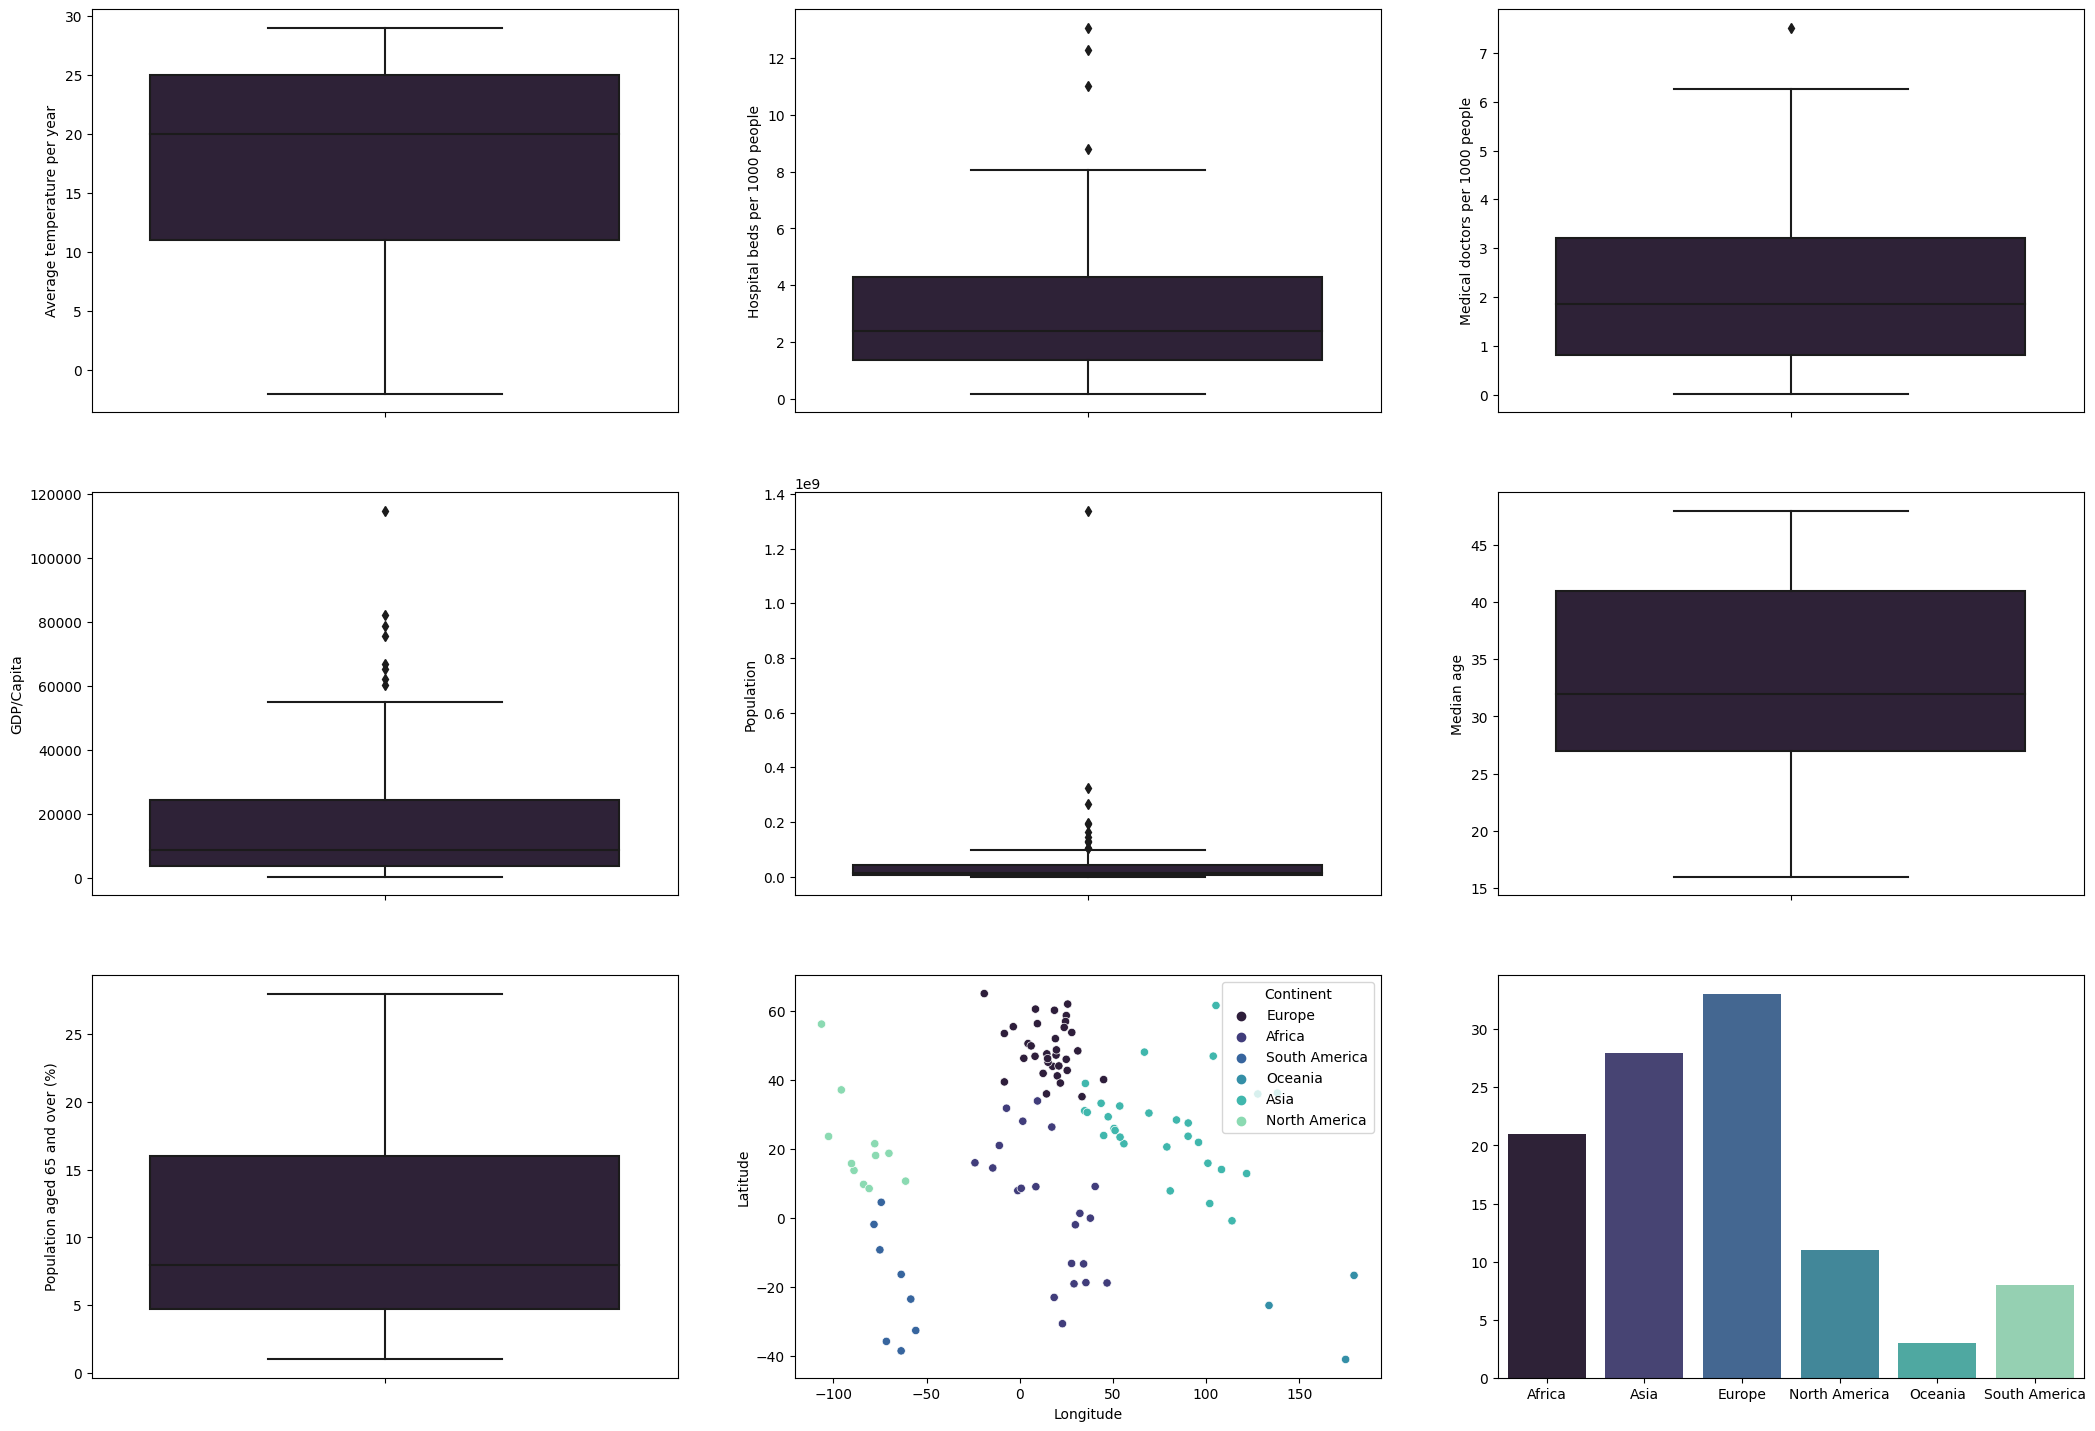

In [211]:

sns.set_palette("mako")

fig, axs = plt.subplots(3, 3 ,figsize=(25.7,17.77))
column=['Average temperature per year',
          'Hospital beds per 1000 people',
          'Medical doctors per 1000 people',
          'GDP/Capita',
          'Population',
          'Median age',
          'Population aged 65 and over (%)',
          'Longitude',
          'Latitude',
          'Continent'
          ]
sns.boxplot(data=countries_stats,y=column[0],ax=axs[0,0])
sns.boxplot(data=countries_stats,y=column[1],ax=axs[0,1])
sns.boxplot(data=countries_stats,y=column[2],ax=axs[0,2])
sns.boxplot(data=countries_stats,y=column[3],ax=axs[1,0])  
sns.boxplot(data=countries_stats,y=column[4],ax=axs[1,1])
sns.boxplot(data=countries_stats,y=column[5],ax=axs[1,2])
sns.boxplot(data=countries_stats,y=column[6],ax=axs[2,0])      
sns.scatterplot(data=countries_stats,x=column[7],y=column[8],hue=column[9],ax=axs[2,1])  

continents, cnt = np.unique(countries_stats[column[9]], return_counts=True)

sns.barplot(x=continents,y=cnt,ax=axs[2,2])   


In [212]:
data_days_stats={}
for country in countries_stats.index:
    single_country=data.loc[data['Entity']==country]
    single_country=single_country[['Date','Daily tests','Cases','Deaths']]
    single_country=single_country.set_index("Date")
    data_days_stats[country]=  single_country

In [213]:
data_days_stats['Albania'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 2020-02-25 to 2021-02-28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Daily tests  370 non-null    float64
 1   Cases        370 non-null    float64
 2   Deaths       370 non-null    float64
dtypes: float64(3)
memory usage: 11.6+ KB


In [214]:
for country in data_days_stats.values():
    country["Daily cases"]=country['Cases'].diff(1)                                                           
    country["Daily deaths"]=country['Deaths'].diff(1)
    

   

In [215]:
for country,dataframes in data_days_stats.items():    
    data_days_stats[country]=dataframes.fillna(0)    
    print(country,data_days_stats[country].describe())
    

Albania        Daily tests        Cases     Deaths  Daily cases  Daily deaths
count    370.00000    370.00000  370.00000    370.00000     370.00000
mean    1170.26486  22774.27568  464.57297    289.64054       4.85405
std     1197.95253  29178.28787  514.30035    334.34597       5.13454
min        0.00000      0.00000    0.00000      0.00000       0.00000
25%      252.00000   1056.50000   33.00000     23.00000       1.00000
50%      808.50000   9139.00000  268.50000    132.50000       3.50000
75%     1903.25000  36653.75000  783.00000    536.50000       7.00000
max     4562.00000 107167.00000 1796.00000   1239.00000      21.00000
Algeria        Daily tests        Cases     Deaths  Daily cases  Daily deaths
count    370.00000    370.00000  370.00000    370.00000     370.00000
mean       8.37838  45655.01892 1480.65676    305.65135       8.06216
std      131.94426  38532.81875  966.70956    245.12528       5.07280
min        0.00000      1.00000    0.00000      0.00000       0.00000
25% 

In [216]:
data_days_stats['Greece']

Daily tests        Cases     Deaths  Daily cases  Daily deaths
Date                                                                      
2020-02-26      0.00000      1.00000    0.00000      0.00000       0.00000
2020-02-27      0.00000      3.00000    0.00000      2.00000       0.00000
2020-02-28      0.00000      4.00000    0.00000      1.00000       0.00000
2020-02-29      0.00000      4.00000    0.00000      0.00000       0.00000
2020-03-01      0.00000      7.00000    0.00000      3.00000       0.00000
...                 ...          ...        ...          ...           ...
2021-02-24   4215.00000 184686.00000 6371.00000   1903.00000      28.00000
2021-02-25  50247.00000 186469.00000 6410.00000   1783.00000      39.00000
2021-02-26      0.00000 188201.00000 6439.00000   1732.00000      29.00000
2021-02-27      0.00000 189831.00000 6468.00000   1630.00000      29.00000
2021-02-28      0.00000 191100.00000 6504.00000   1269.00000      36.00000

[369 rows x 5 columns]

[Text(0.5, 1.0, 'Ireland')]

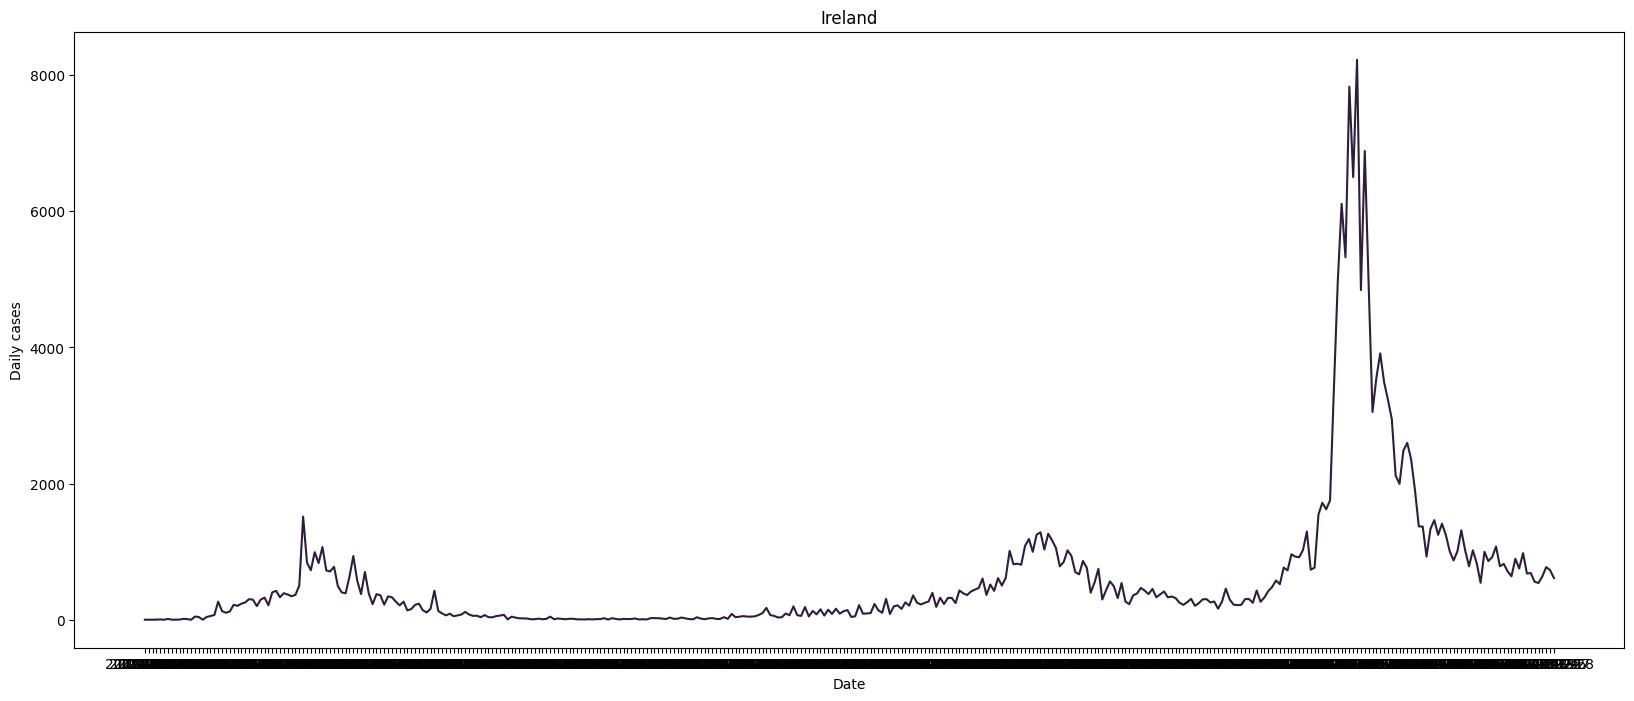

In [217]:
fig, axes = plt.subplots(figsize=(20, 8) )
country,dataframes = rnd.choice(list(data_days_stats.items()))
sns.lineplot(data=dataframes,x=dataframes.index,y='Daily cases').set(title=country)


In [218]:
for country in data_days_stats:   
    print(data_days_stats[country].head(50))
    print(data_days_stats[country].tail(20))

            Daily tests     Cases   Deaths  Daily cases  Daily deaths
Date                                                                 
2020-02-25      8.00000   0.00000  0.00000      0.00000       0.00000
2020-02-26      5.00000   0.00000  0.00000      0.00000       0.00000
2020-02-27      4.00000   0.00000  0.00000      0.00000       0.00000
2020-02-28      1.00000   0.00000  0.00000      0.00000       0.00000
2020-02-29      8.00000   0.00000  0.00000      0.00000       0.00000
2020-03-01      3.00000   0.00000  0.00000      0.00000       0.00000
2020-03-02      2.00000   0.00000  0.00000      0.00000       0.00000
2020-03-03      5.00000   0.00000  0.00000      0.00000       0.00000
2020-03-04      6.00000   0.00000  0.00000      0.00000       0.00000
2020-03-05      8.00000   0.00000  0.00000      0.00000       0.00000
2020-03-06      3.00000   0.00000  0.00000      0.00000       0.00000
2020-03-07      5.00000   0.00000  0.00000      0.00000       0.00000
2020-03-08      1.00

In [219]:
mean_daily_tests=[]
mean_daily_cases=[]
mean_daily_deaths=[]
mean_daily_spreading=[]
for dataframes in data_days_stats.values():
    mean_daily_tests.append(dataframes["Daily tests"].mean())
    mean_daily_cases.append(dataframes['Daily cases'].loc[dataframes["Cases"]>10].mean())
    mean_daily_deaths.append(dataframes['Daily deaths'].loc[dataframes["Cases"]>10].mean())   
                                                      

In [220]:
countries_stats['Mean daily tests']=mean_daily_tests
countries_stats['Mean daily cases']=mean_daily_cases
countries_stats['Mean daily deaths']=mean_daily_deaths



In [221]:
countries_stats.head(10)

Continent  Latitude  Longitude  Average temperature per year  \
Country                                                                        
Albania            Europe  41.15000   20.17000                            14   
Algeria            Africa  28.03000    1.66000                            25   
Argentina   South America -38.42000  -63.62000                            14   
Armenia            Europe  40.07000   45.04000                            11   
Australia         Oceania -25.27000  133.78000                            22   
Austria            Europe  47.52000   14.55000                             8   
Bahrain              Asia  25.93000   50.64000                            27   
Bangladesh           Asia  23.68000   90.36000                            25   
Belarus            Europe  53.71000   27.95000                             8   
Belgium            Europe  50.50000    4.47000                            10   

            Hospital beds per 1000 people  Medical doctors per 1000 people  \
Country                                                                      
Albania                           2.89000                          1.29000   
Algeria                           1.90000                          1.83000   
Argentina                         5.00000                          3.91000   
Armenia                           4.20000                          2.80000   
Australia                         3.84000                          3.50000   
Austria                           7.37000                          5.23000   
Bahrain                           2.00000                          0.92000   
Bangladesh                        0.80000                          0.47000   
Belarus                          11.00000                          4.07000   
Belgium                           5.64000                          3.01000   

            GDP/Capita  Population  Median age  \
Country                                          
Albania     5353.20000     2873457          38   
Algeria     3974.00000    41318142          29   
Argentina   9912.30000    44271041          31   
Armenia     4622.70000     2930450          35   
Australia  55060.30000    24598933          37   
Austria    50137.70000     8809212          44   
Bahrain    23504.00000     1492584          32   
Bangladesh  1855.70000   164669751          27   
Belarus     6663.30000     9507875          40   
Belgium    46420.70000    11372068          41   

            Population aged 65 and over (%)  Mean daily tests  \
Country                                                         
Albania                                  14        1170.26486   
Algeria                                   6           8.37838   
Argentina                                11       15085.97772   
Armenia                                  11         273.03562   
Australia                                16       23341.35250   
Austria                                  19       38566.58108   
Bahrain                                   2        6934.72507   
Bangladesh                                5       11050.57182   
Belarus                                  15        1292.04632   
Belgium                                  19       23893.75959   

            Mean daily cases  Mean daily deaths  
Country                                          
Albania            301.85070            5.05915  
Algeria            312.39503            8.24033  
Argentina         5886.47207          145.15363  
Armenia            488.77841            9.06818  
Australia           73.52538            2.30711  
Austria           1258.71507           23.45479  
Bahrain            330.79189            1.21351  
Bangladesh        1569.55747           24.16092  
Belarus            811.57345            5.58192  
Belgium           2125.35262           60.81818

In [222]:
countries_stats['Mean daily tests']=countries_stats['Mean daily tests'].apply(lambda  x:round(x))
countries_stats['Mean daily cases']=countries_stats['Mean daily cases'].apply(lambda  x:round(x))

countries_stats['Mean daily deaths']=countries_stats['Mean daily deaths'].apply(lambda  x:round(x))

In [223]:
total_tests=[]
for dataframe in data_days_stats.values():
    total_tests.append(dataframe['Daily tests'].sum())
countries_stats['Total tests']= total_tests    

total_cases=[]
for dataframe in data_days_stats.values():
    total_cases.append(dataframe.loc['2021-02-28','Cases'])
countries_stats['Total cases']= total_cases  

total_deaths=[]
for dataframe in data_days_stats.values():
   
    total_deaths.append(dataframe.loc['2021-02-28','Deaths'])
    

countries_stats['Total deaths']= total_deaths 

In [224]:

    

countries_stats['Total tests per total population percentage (%)']=countries_stats['Total tests']/countries_stats['Population']*100
countries_stats['Mean daily tests per Mean daily cases ratio']=countries_stats['Mean daily tests']/countries_stats['Mean daily cases']*100
#countries_stats['Total tests per one thousand people']=countries_stats['Total tests']/countries_stats['Population']*1000

In [225]:

total_deaths=[]

countries_stats['Covid cases per total population percentage (%)']=countries_stats['Total cases']/countries_stats['Population']*100
countries_stats['Mean daily cases per Mean daily deaths']=countries_stats['Mean daily cases']/countries_stats['Mean daily deaths']*100
#countries_stats['Covid cases per one thousand people']=countries_stats['Total cases']/countries_stats['Population']*1000



In [226]:
 
countries_stats['Total deaths per total population percentage (%)']=countries_stats['Total deaths']/countries_stats['Population']*100
#countries_stats['Total deaths per one thousand people']=countries_stats['Total deaths']/countries_stats['Population']*1000

In [227]:
countries_stats['Covid mortality (%)']=countries_stats['Total deaths']/countries_stats['Total cases']*100

countries_stats['Covid mortality per one thousand people']=countries_stats['Total deaths']/countries_stats['Total cases']*1000


In [228]:
Covid_Mortality_Increase=[]
for country,dataframe in data_days_stats.items():
 
    country_data=countries_stats.loc[country]
    intensive_days=dataframe.loc[dataframe['Daily cases']>country_data['Mean daily cases']]
    mean_intensive=intensive_days['Daily deaths'].sum()/intensive_days['Daily cases'].sum()*100
    Covid_Mortality_Increase.append(country_data['Covid mortality (%)'] -mean_intensive)
countries_stats['Covid mortality (%) increase in intensive days'] = Covid_Mortality_Increase

In [229]:


countries_stats['Positivity of test covids (%)']=countries_stats['Total cases']/countries_stats['Total tests']

In [230]:
pd.set_option('display.max_rows', 365)
pd.set_option('display.max_columns', 365)


In [231]:
sorting_column='Positivity of test covids (%)'
countries_stats.sort_values(by=sorting_column,ascending=0)

Continent  Latitude  Longitude  \
Country                                                      
Algeria                        Africa  28.03000    1.66000   
Armenia                        Europe  40.07000   45.04000   
Tunisia                        Africa  33.89000    9.54000   
Mauritania                     Africa  21.01000  -10.94000   
Oman                             Asia  21.51000   55.92000   
Madagascar                     Africa -18.77000   46.87000   
Belarus                        Europe  53.71000   27.95000   
Malawi                         Africa -13.25000   34.30000   
Peru                    South America  -9.19000  -75.02000   
Mexico                  North America  23.63000 -102.55000   
Dominican Republic      North America  18.74000  -70.16000   
Bolivia                 South America -16.29000  -63.59000   
Costa Rica              North America   9.75000  -83.75000   
Argentina               South America -38.42000  -63.62000   
Iran                             Asia  32.43000   53.69000   
Ecuador                 South America  -1.83000  -78.18000   
Bosnia and Herzegovina         Europe  43.92000   17.68000   
Ukraine                        Europe  48.38000   31.17000   
Albania                        Europe  41.15000   20.17000   
Indonesia                        Asia  -0.79000  113.92000   
Libya                          Africa  26.34000   17.23000   
Nigeria                        Africa   9.08000    8.68000   
Paraguay                South America -23.44000  -58.44000   
Colombia                South America   4.57000  -74.30000   
Guatemala               North America  15.78000  -90.23000   
Croatia                        Europe  45.10000   15.20000   
Poland                         Europe  51.92000   19.15000   
Kenya                          Africa  -0.02000   37.91000   
Panama                  North America   8.54000  -80.78000   
Jamaica                 North America  18.11000  -77.30000   
Bulgaria                       Europe  42.73000   25.49000   
South Africa                   Africa -30.56000   22.94000   
Romania                        Europe  45.94000   24.97000   
Serbia                         Europe  44.02000   21.01000   
Cape Verde                     Africa  16.00000  -24.01000   
Jordan                           Asia  30.59000   36.24000   
Mozambique                     Africa -18.67000   35.53000   
Bangladesh                       Asia  23.68000   90.36000   
Iraq                             Asia  33.22000   43.68000   
Hungary                        Europe  47.16000   19.50000   
Namibia                        Africa -22.96000   18.49000   
Nepal                            Asia  28.39000   84.12000   
Switzerland                    Europe  46.82000    8.23000   
Kuwait                           Asia  29.31000   47.48000   
El Salvador             North America  13.79000  -88.90000   
Sweden                         Europe  60.13000   18.64000   
Ghana                          Africa   7.95000   -1.02000   
Slovenia                       Europe  46.15000   15.00000   
Qatar                            Asia  25.35000   51.18000   
Portugal                       Europe  39.40000   -8.22000   
Zimbabwe                       Africa -19.02000   29.15000   
Morocco                        Africa  31.79000   -7.09000   
Lithuania                      Europe  55.17000   23.88000   
Chile                   South America -35.68000  -71.54000   
Senegal                        Africa  14.50000  -14.45000   
United States           North America  37.09000  -95.71000   
Trinidad and Tobago     North America  10.69000  -61.22000   
Belgium                        Europe  50.50000    4.47000   
Turkey                           Asia  38.96000   35.24000   
Ethiopia                       Africa   9.14000   40.49000   
Zambia                         Africa -13.13000   27.85000   
Italy                          Europe  41.87000   12.57000   
Uganda                         Africa   1.37000   32.29000  

<Axes: ylabel='Total deaths per total population percentage (%)'>

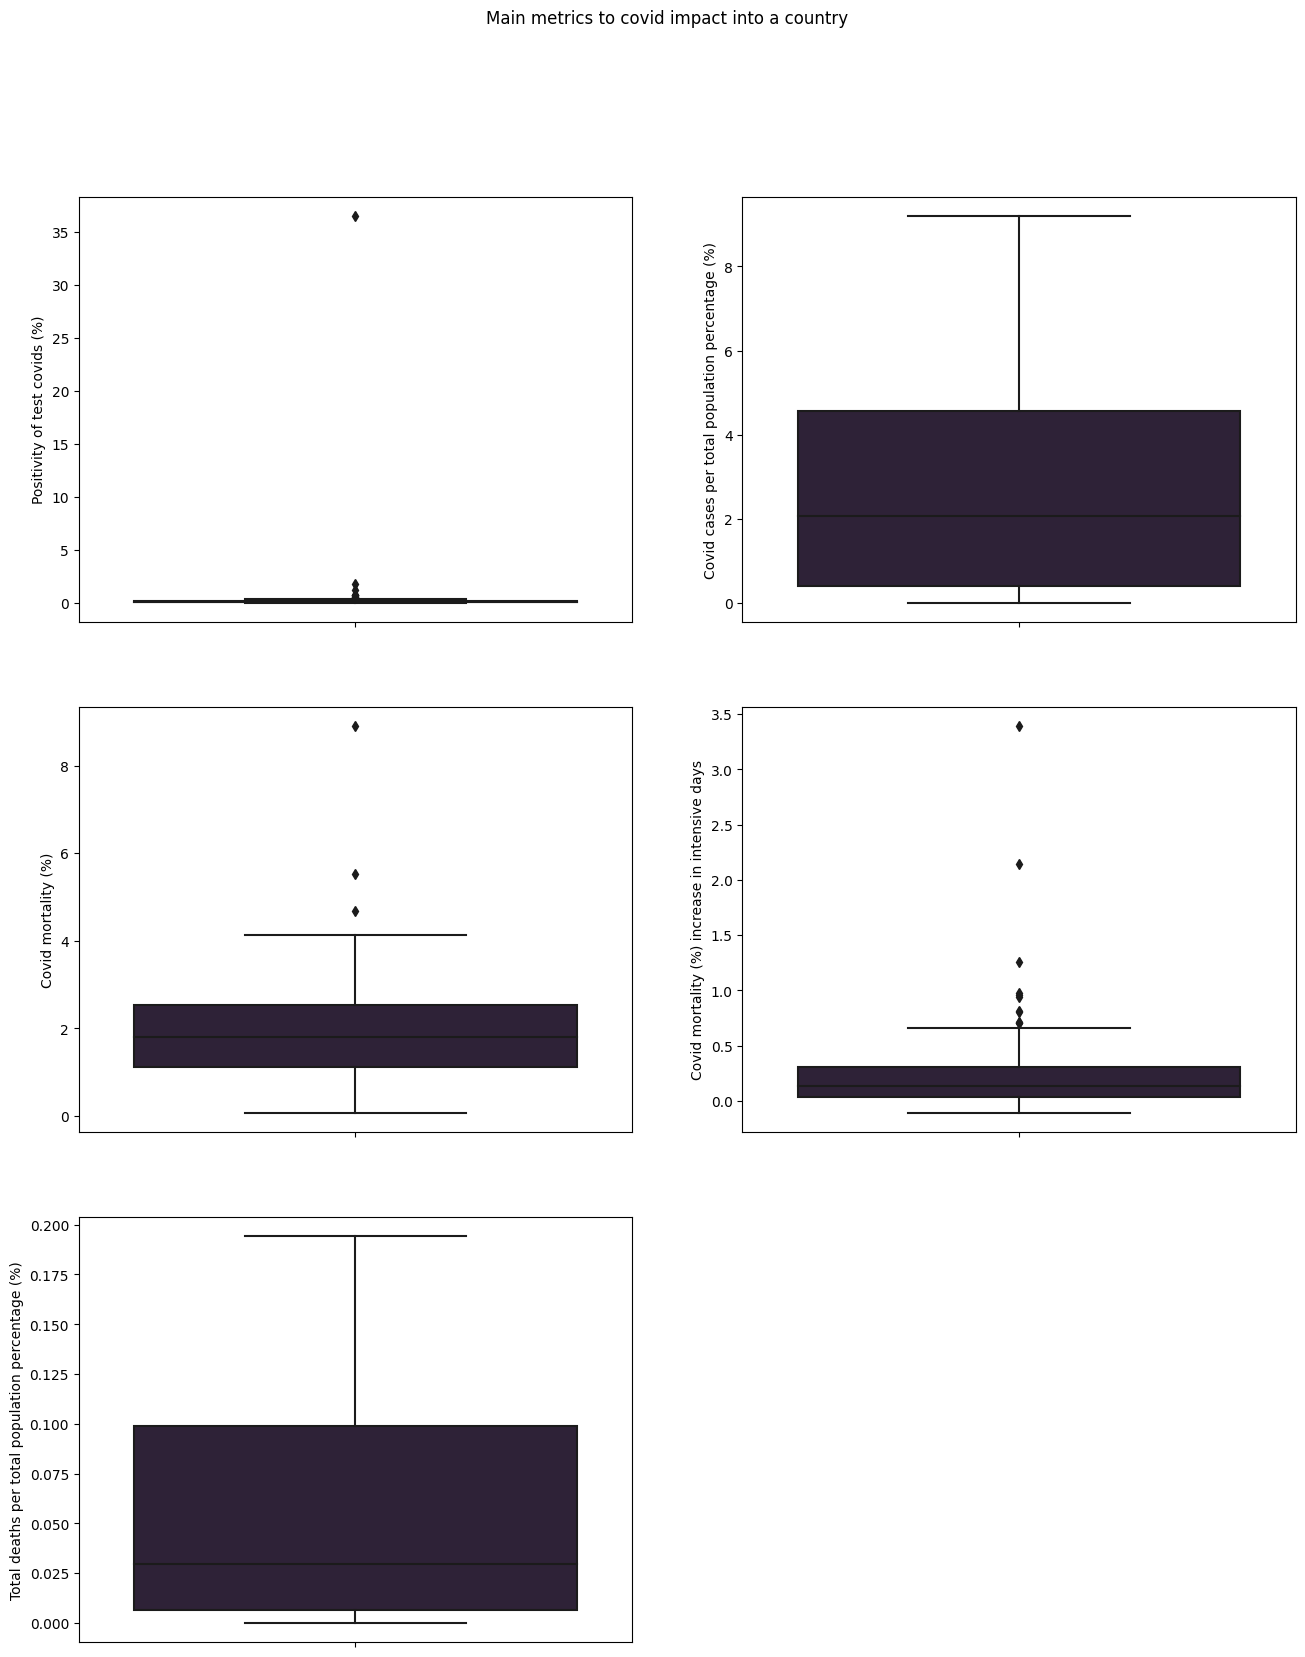

In [232]:

fig, axs = plt.subplots(3, 2 ,figsize=(15.7,18.77))
fig.suptitle('Main metrics to covid impact into a country')
column=['Positivity of test covids (%)',
        'Covid cases per total population percentage (%)',
        'Covid mortality (%)',
        'Covid mortality (%) increase in intensive days',
        'Total deaths per total population percentage (%)'
          ]
fig.delaxes(axs[2,1])          
sns.boxplot(data=countries_stats,y=column[0],ax=axs[0,0])
sns.boxplot(data=countries_stats,y=column[1],ax=axs[0,1])
sns.boxplot(data=countries_stats,y=column[2],ax=axs[1,0])
sns.boxplot(data=countries_stats,y=column[3],ax=axs[1,1])  
sns.boxplot(data=countries_stats,y=column[4],ax=axs[2,0])  

In [233]:


def remove_outlier(df, column, lower_bound=0.25,upper_bound=0.75):
    # Find first and third quartile
    q1 = df[column].quantile(lower_bound)
    q3 = df[column].quantile(upper_bound)
    
    # Find interquartile range
    IQR = q3 - q1
    
    # Find lower and upper bound
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    # Remove outliers
    df[column] = df[column][df[column] > lower_bound]
    df[column] = df[column][df[column] < upper_bound]
    
    return df
def HueDistrubition(column):
    bins=pd.cut(column,[0,column.quantile(0.05),column.quantile(0.2),column.quantile(0.4),column.quantile(0.6),column.quantile(0.8),column.quantile(0.95),column.quantile(1)])    
    return bins

<Axes: ylabel='Total deaths per total population percentage (%)'>

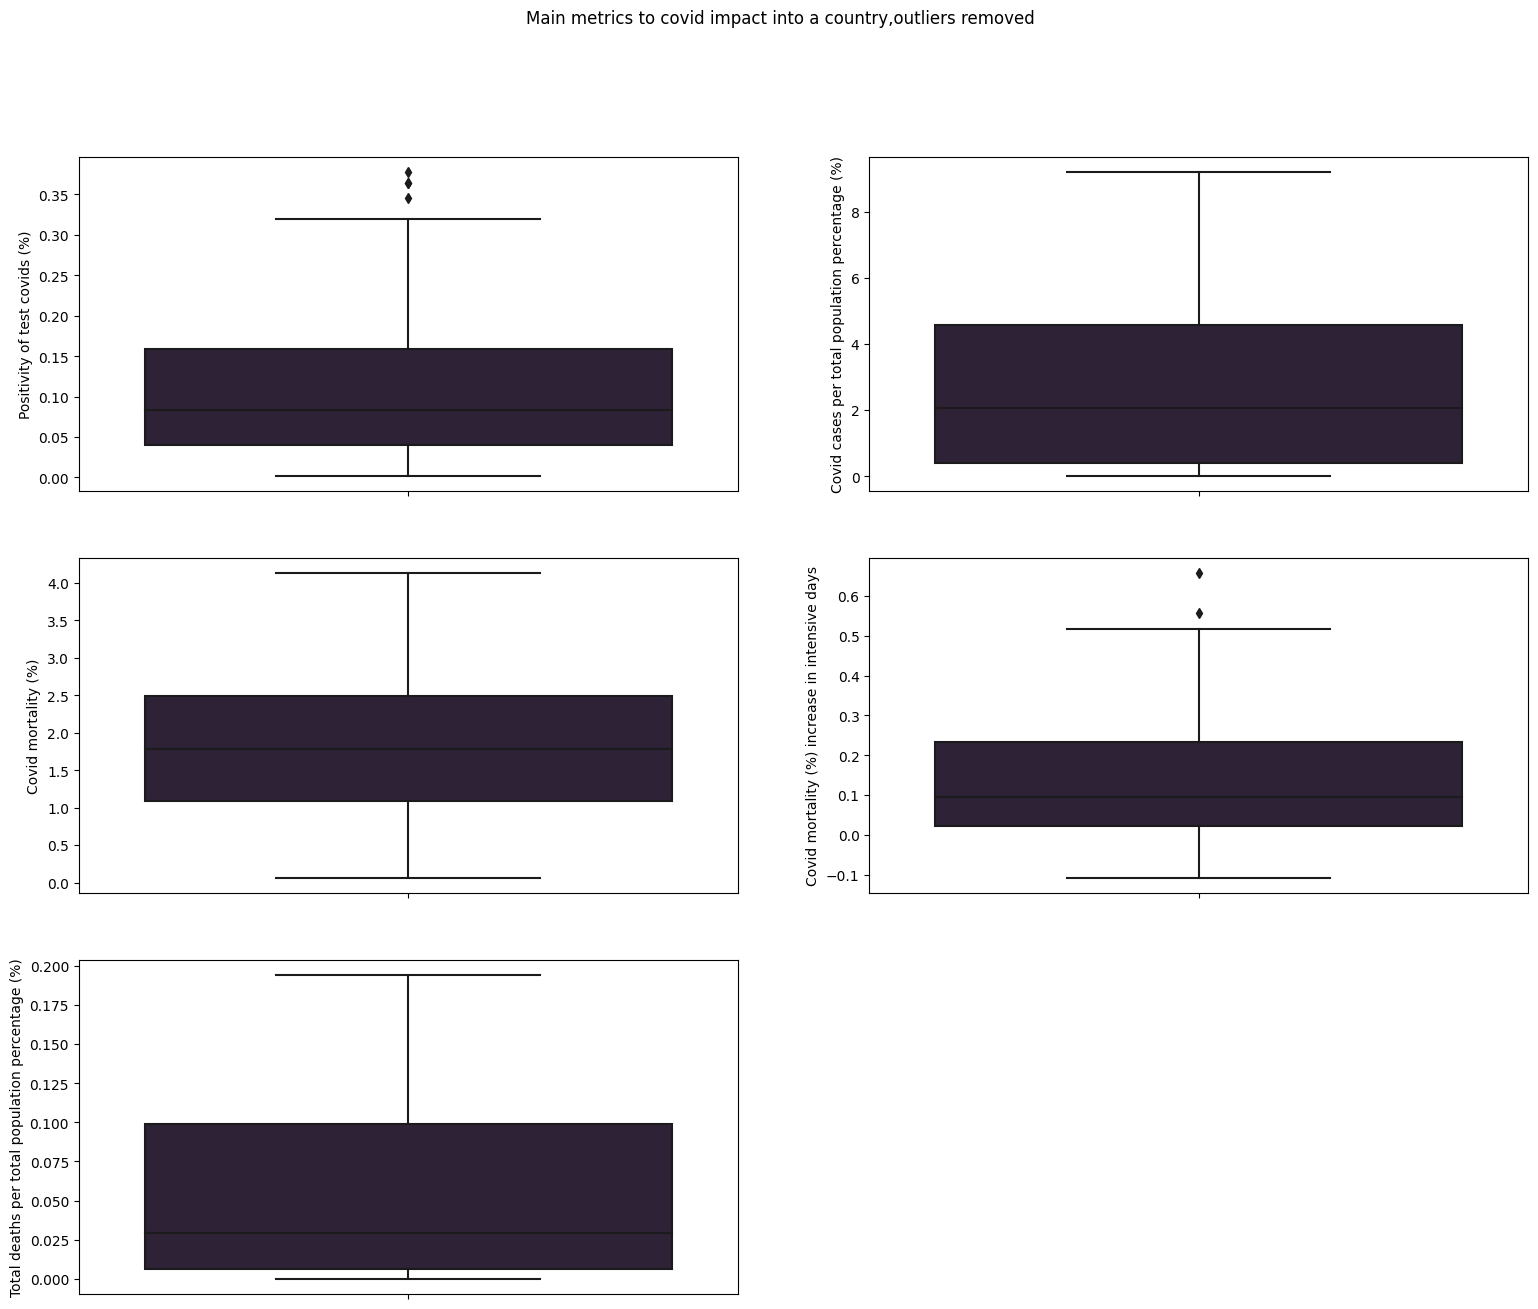

In [234]:

fig, axs = plt.subplots(3, 2 ,figsize=(18.7,14.77))
fig.suptitle('Main metrics to covid impact into a country,outliers removed')

columns=['Positivity of test covids (%)',
        'Covid cases per total population percentage (%)',
        'Covid mortality (%)',
        'Covid mortality (%) increase in intensive days',
        'Total deaths per total population percentage (%)'
          ]
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)
fig.delaxes(axs[2,1])          
sns.boxplot(data=plot_data,y=columns[0],ax=axs[0,0])
sns.boxplot(data=plot_data,y=columns[1],ax=axs[0,1])
sns.boxplot(data=plot_data,y=columns[2],ax=axs[1,0])
sns.boxplot(data=plot_data,y=columns[3],ax=axs[1,1])  
sns.boxplot(data=plot_data,y=columns[4],ax=axs[2,0])  

In [235]:
sns.set_palette("mako")

<Axes: xlabel='Total deaths per total population percentage (%)', ylabel='Positivity of test covids (%)'>

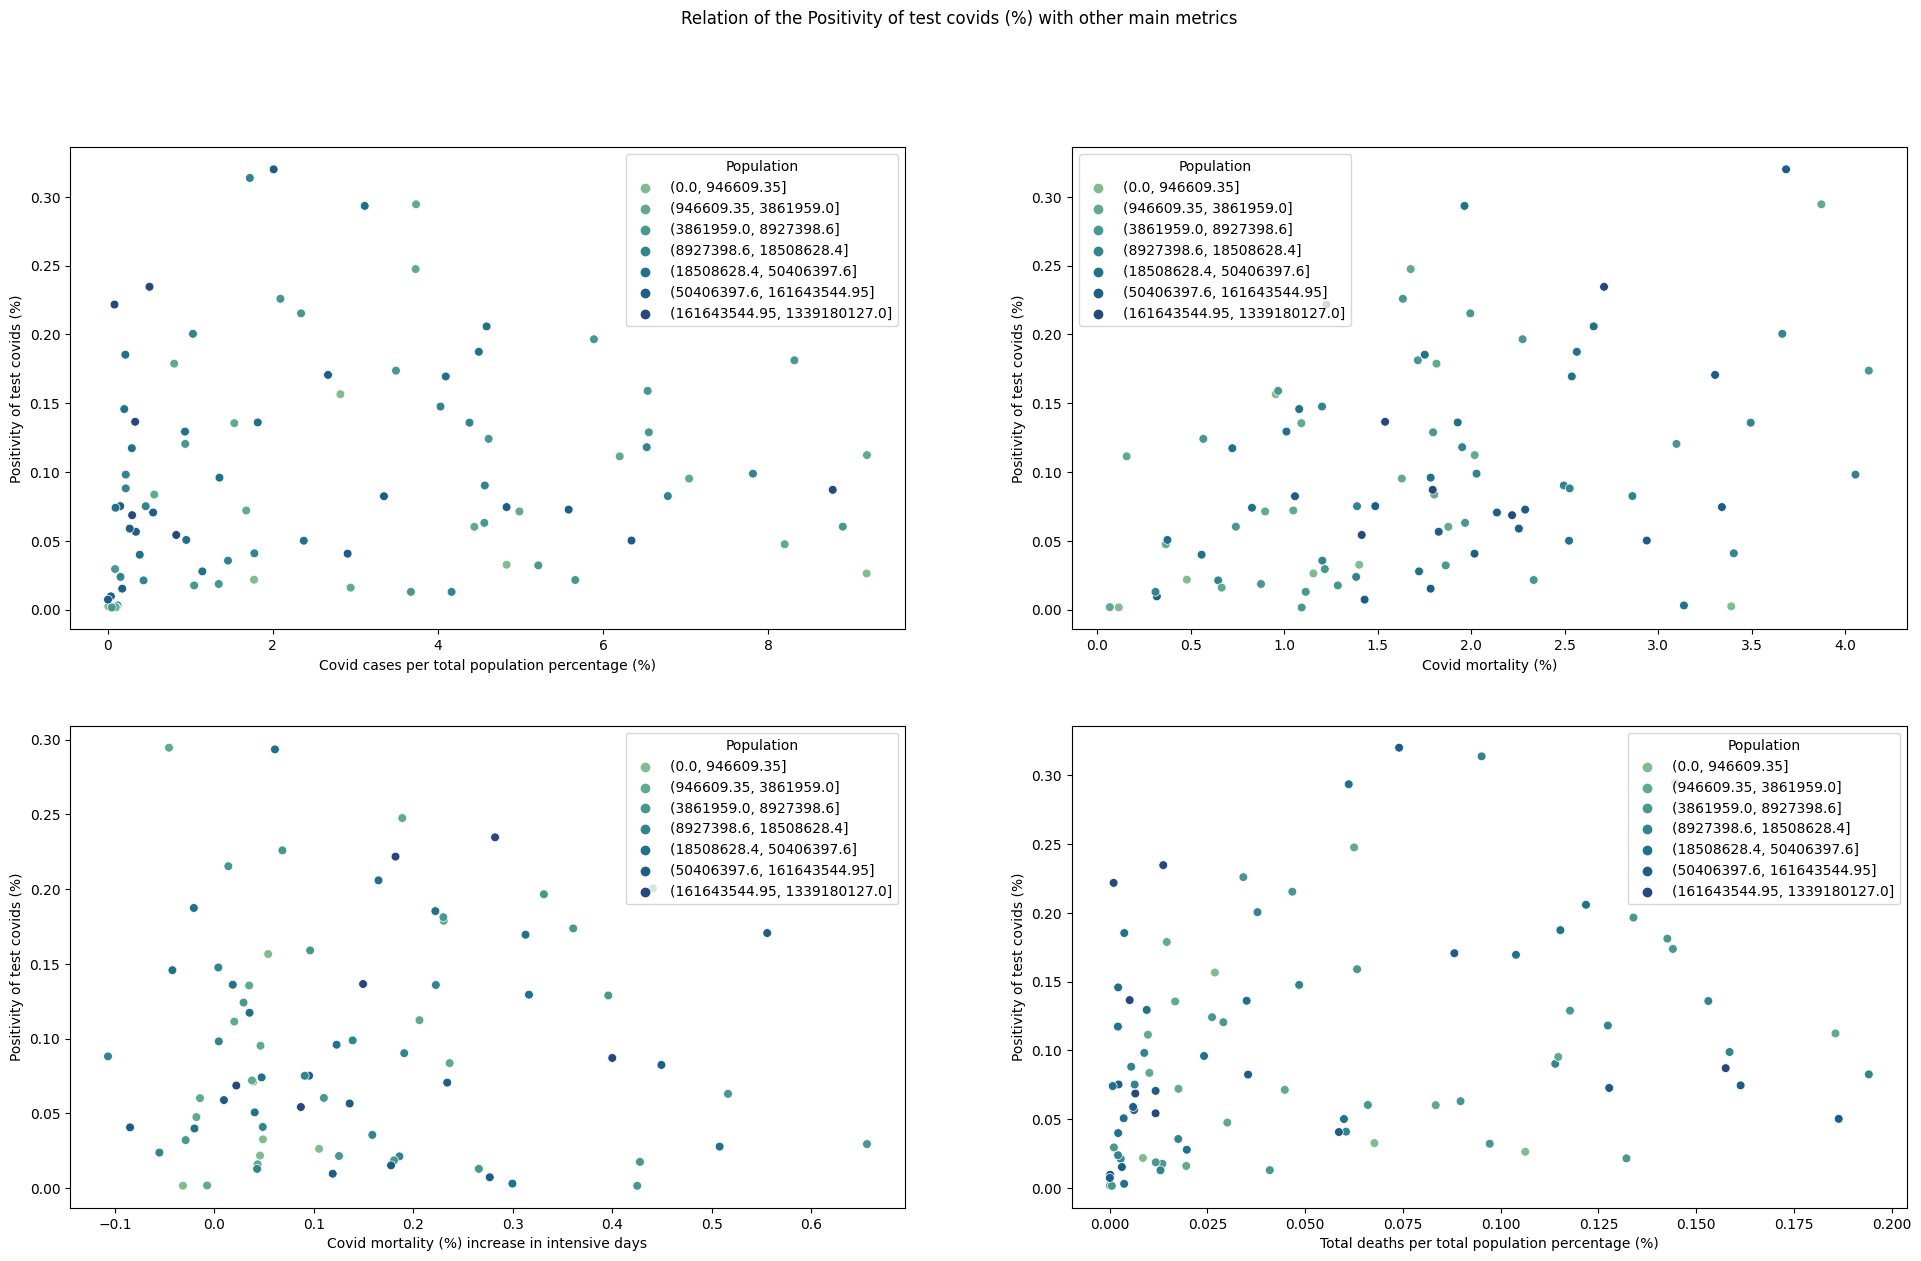

In [236]:
fig, axs = plt.subplots(2, 2 ,figsize=(23.7,13.77))
fig.suptitle('Relation of the Positivity of test covids (%) with other main metrics')
x_columns=[
        'Covid cases per total population percentage (%)',
        'Covid mortality (%)',
        'Covid mortality (%) increase in intensive days',
        'Total deaths per total population percentage (%)'
          ]
y_column='Positivity of test covids (%)'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )                                                       

<Axes: xlabel='Total deaths per total population percentage (%)', ylabel='Covid cases per total population percentage (%)'>

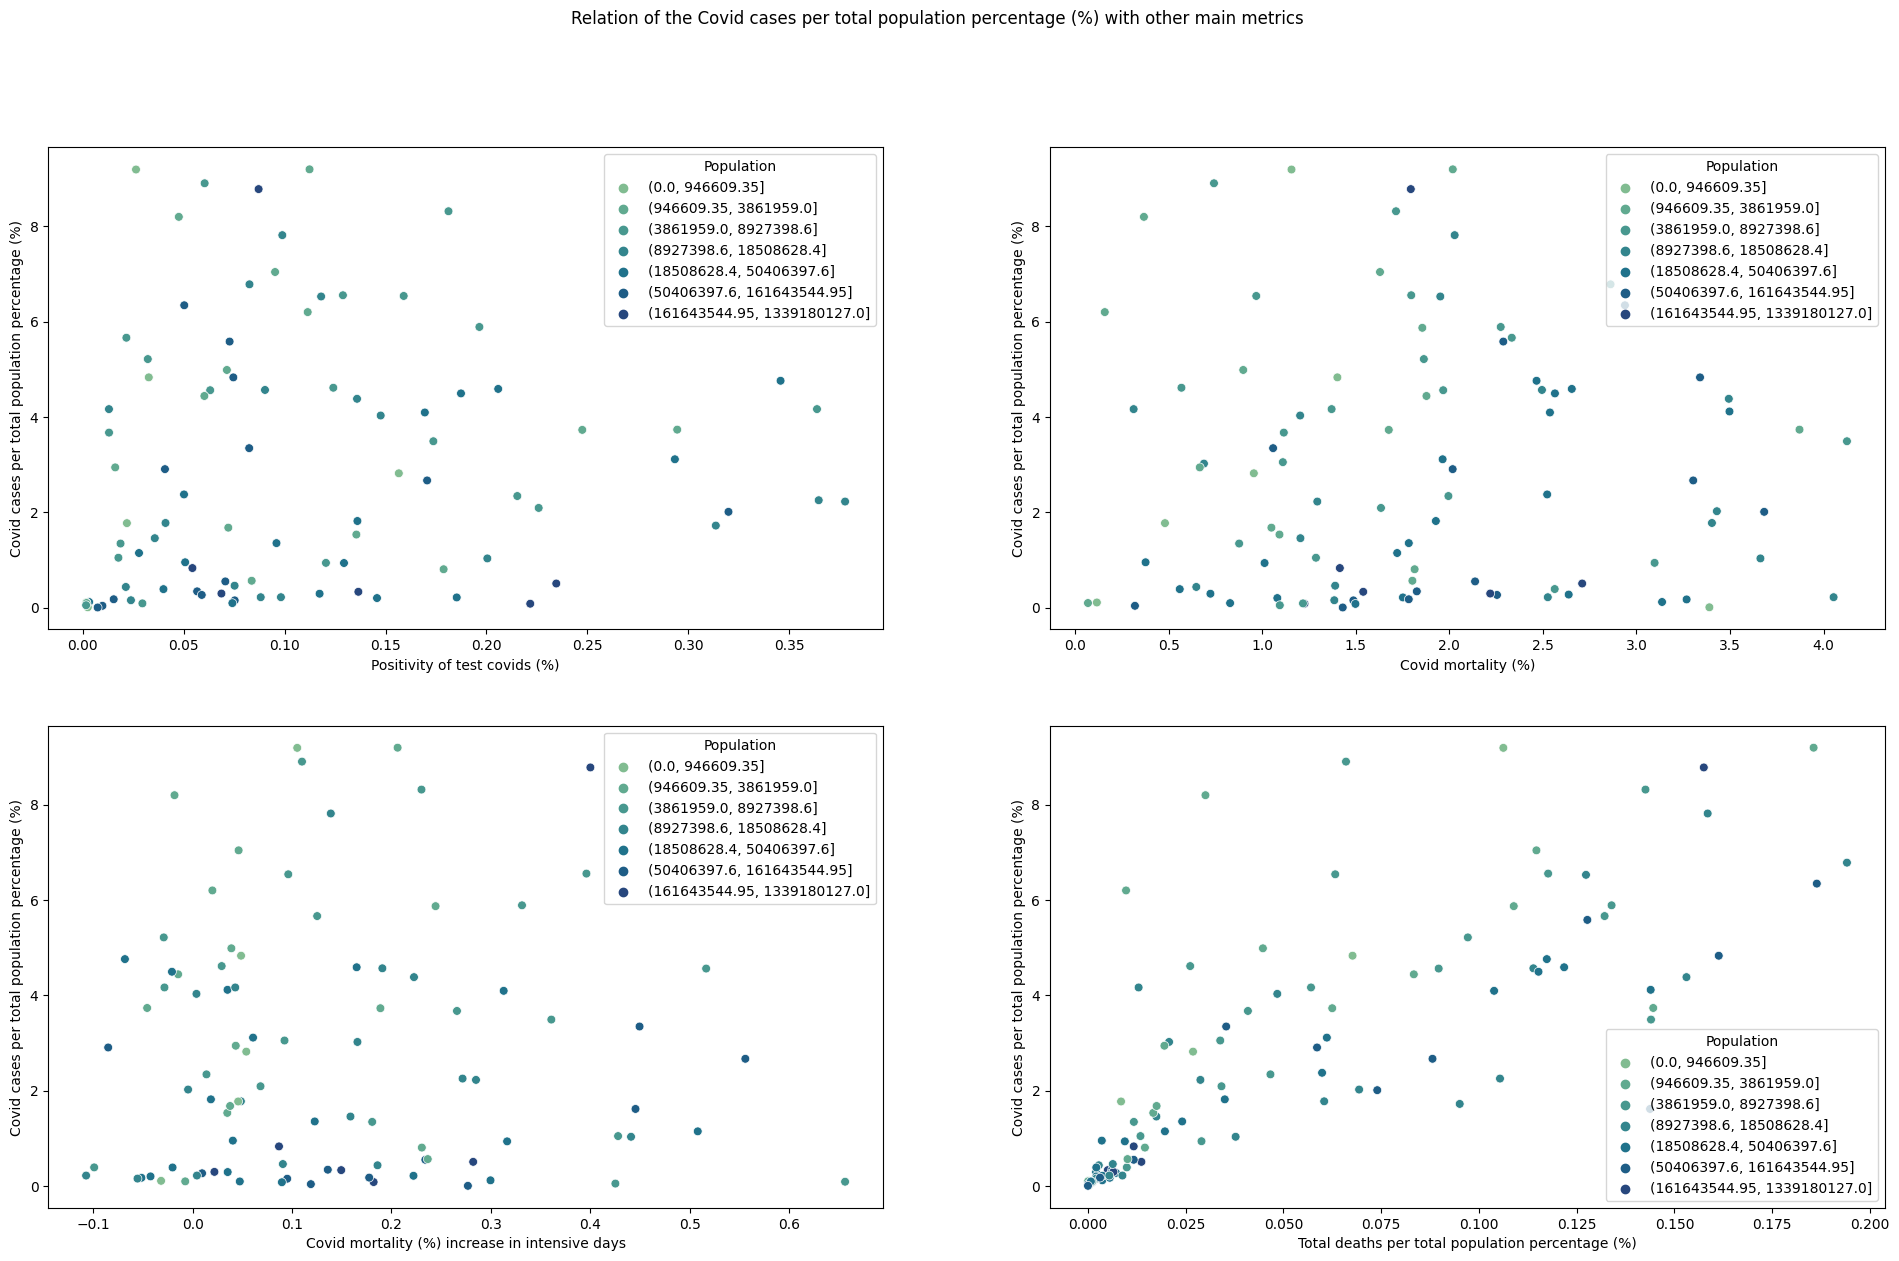

In [237]:
fig, axs = plt.subplots(2, 2 ,figsize=(23.7,13.77))
fig.suptitle('Relation of the Covid cases per total population percentage (%) with other main metrics')
x_columns=['Positivity of test covids (%)',
        'Covid mortality (%)',
        'Covid mortality (%) increase in intensive days',
        'Total deaths per total population percentage (%)'
          ]
y_column='Covid cases per total population percentage (%)'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )                                                       

<Axes: xlabel='Total deaths per total population percentage (%)', ylabel='Covid mortality (%)'>

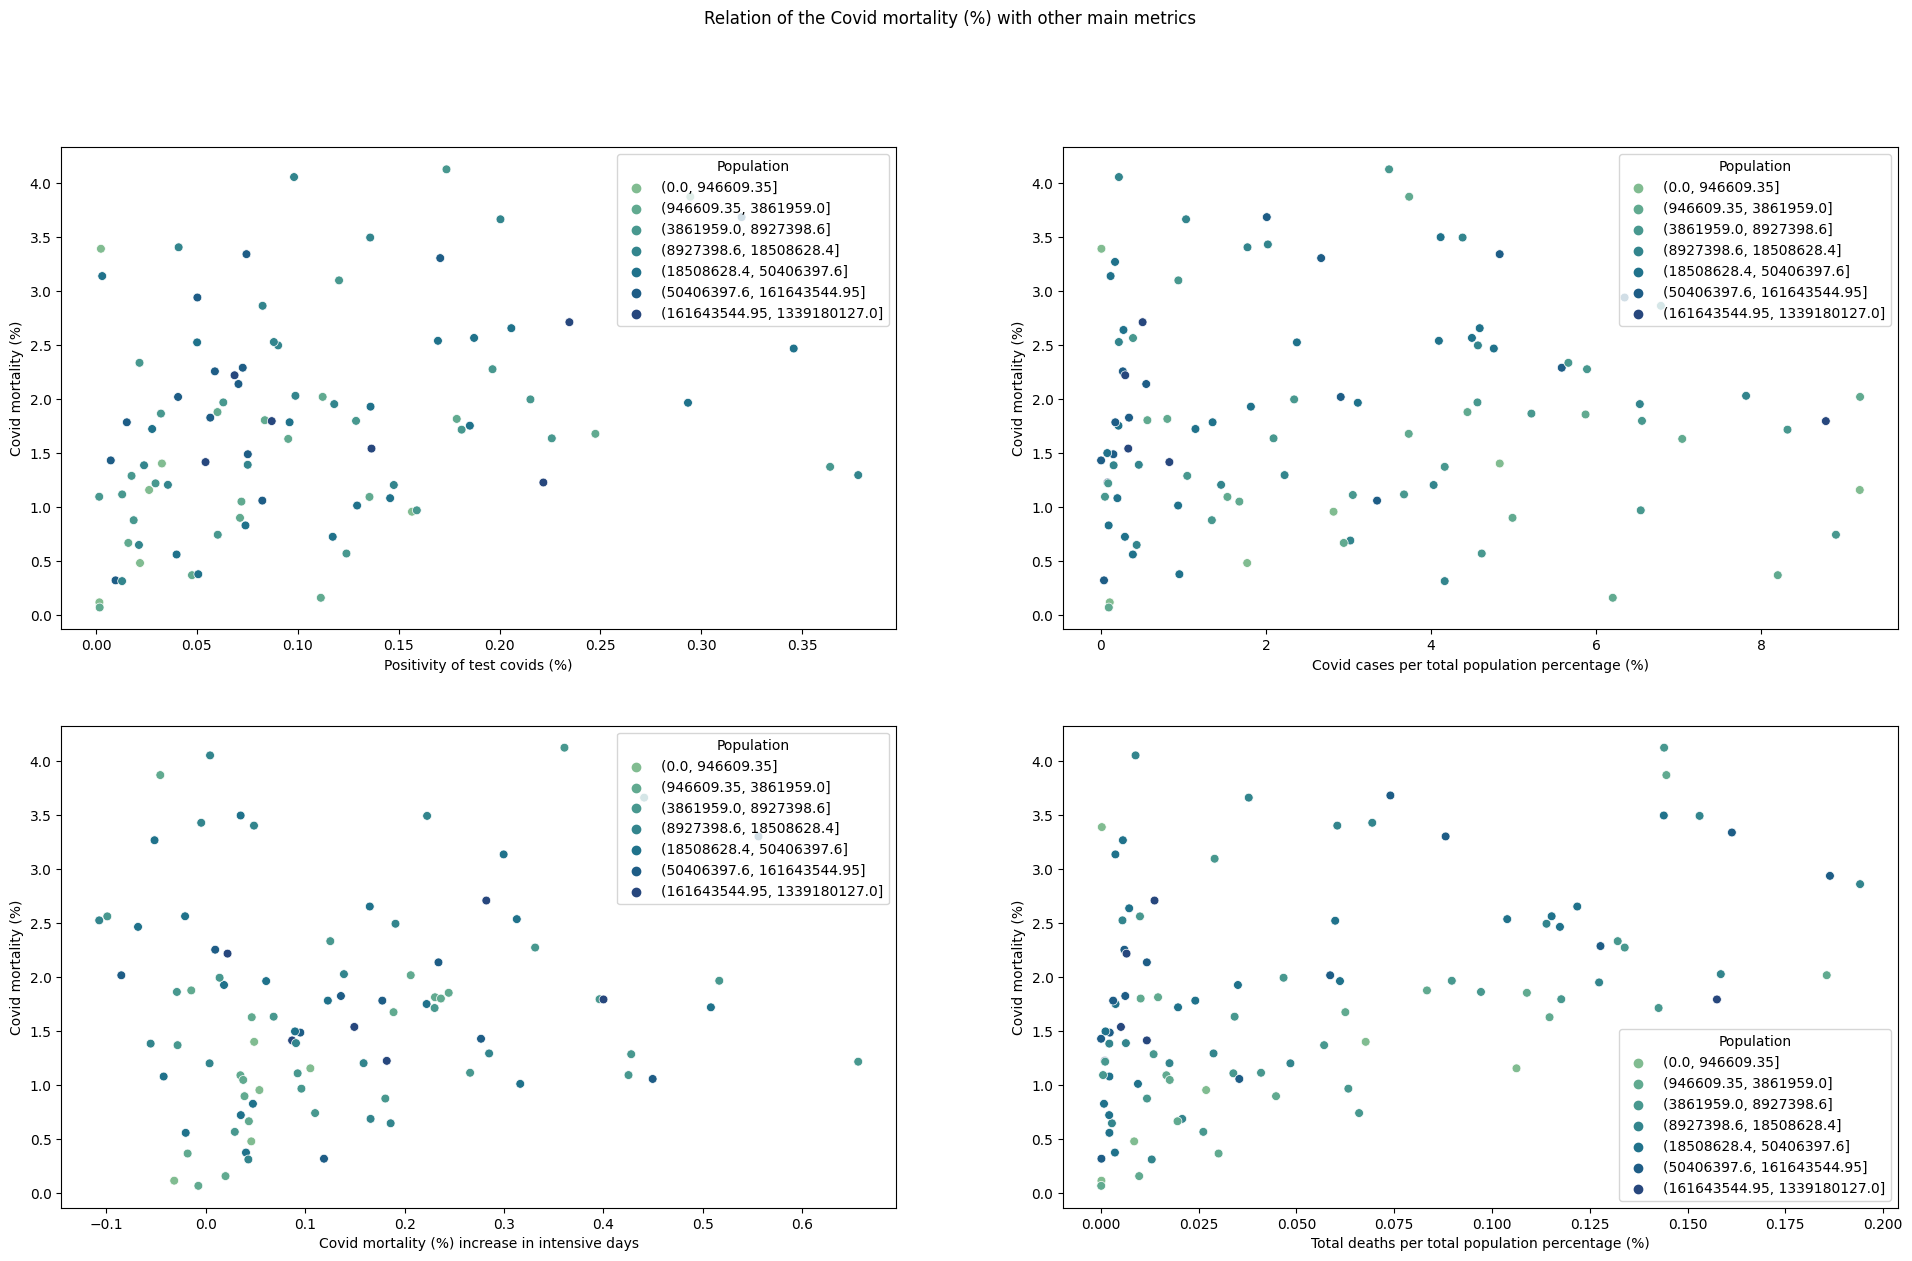

In [238]:
fig, axs = plt.subplots(2, 2 ,figsize=(23.7,13.77))
fig.suptitle('Relation of the Covid mortality (%) with other main metrics')
x_columns=['Positivity of test covids (%)',
           'Covid cases per total population percentage (%)',     
            'Covid mortality (%) increase in intensive days',
            'Total deaths per total population percentage (%)'
          ]
y_column= 'Covid mortality (%)'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )                          

<Axes: xlabel='Total deaths per total population percentage (%)', ylabel='Covid mortality (%) increase in intensive days'>

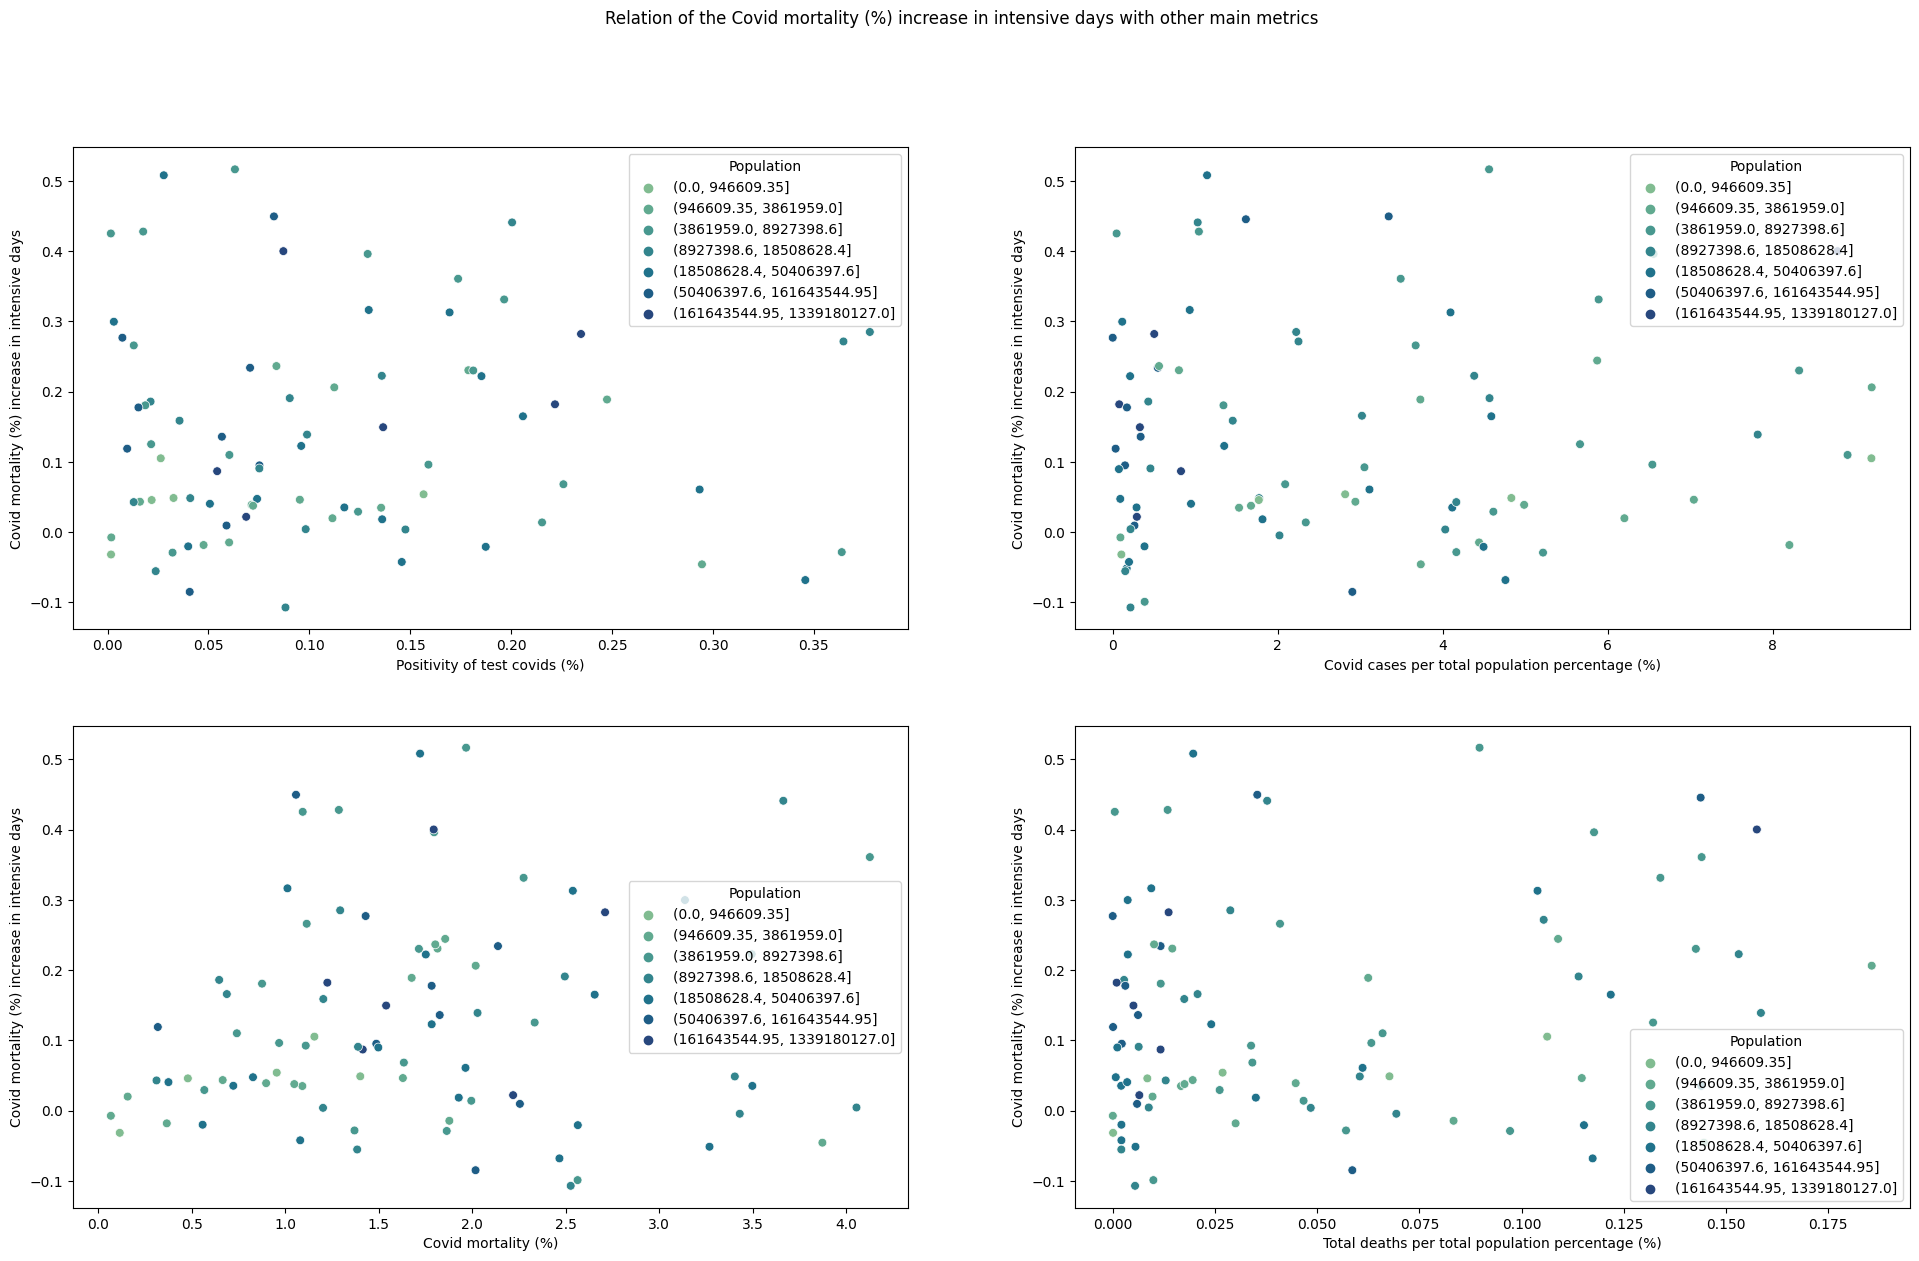

In [239]:
fig, axs = plt.subplots(2, 2 ,figsize=(23.7,13.77))
fig.suptitle('Relation of the Covid mortality (%) increase in intensive days with other main metrics')
x_columns=['Positivity of test covids (%)',
           'Covid cases per total population percentage (%)',
           'Covid mortality (%)',     
            'Total deaths per total population percentage (%)'
          ]
y_column= 'Covid mortality (%) increase in intensive days'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )                          

<Axes: xlabel='Covid mortality (%)', ylabel='Total deaths per total population percentage (%)'>

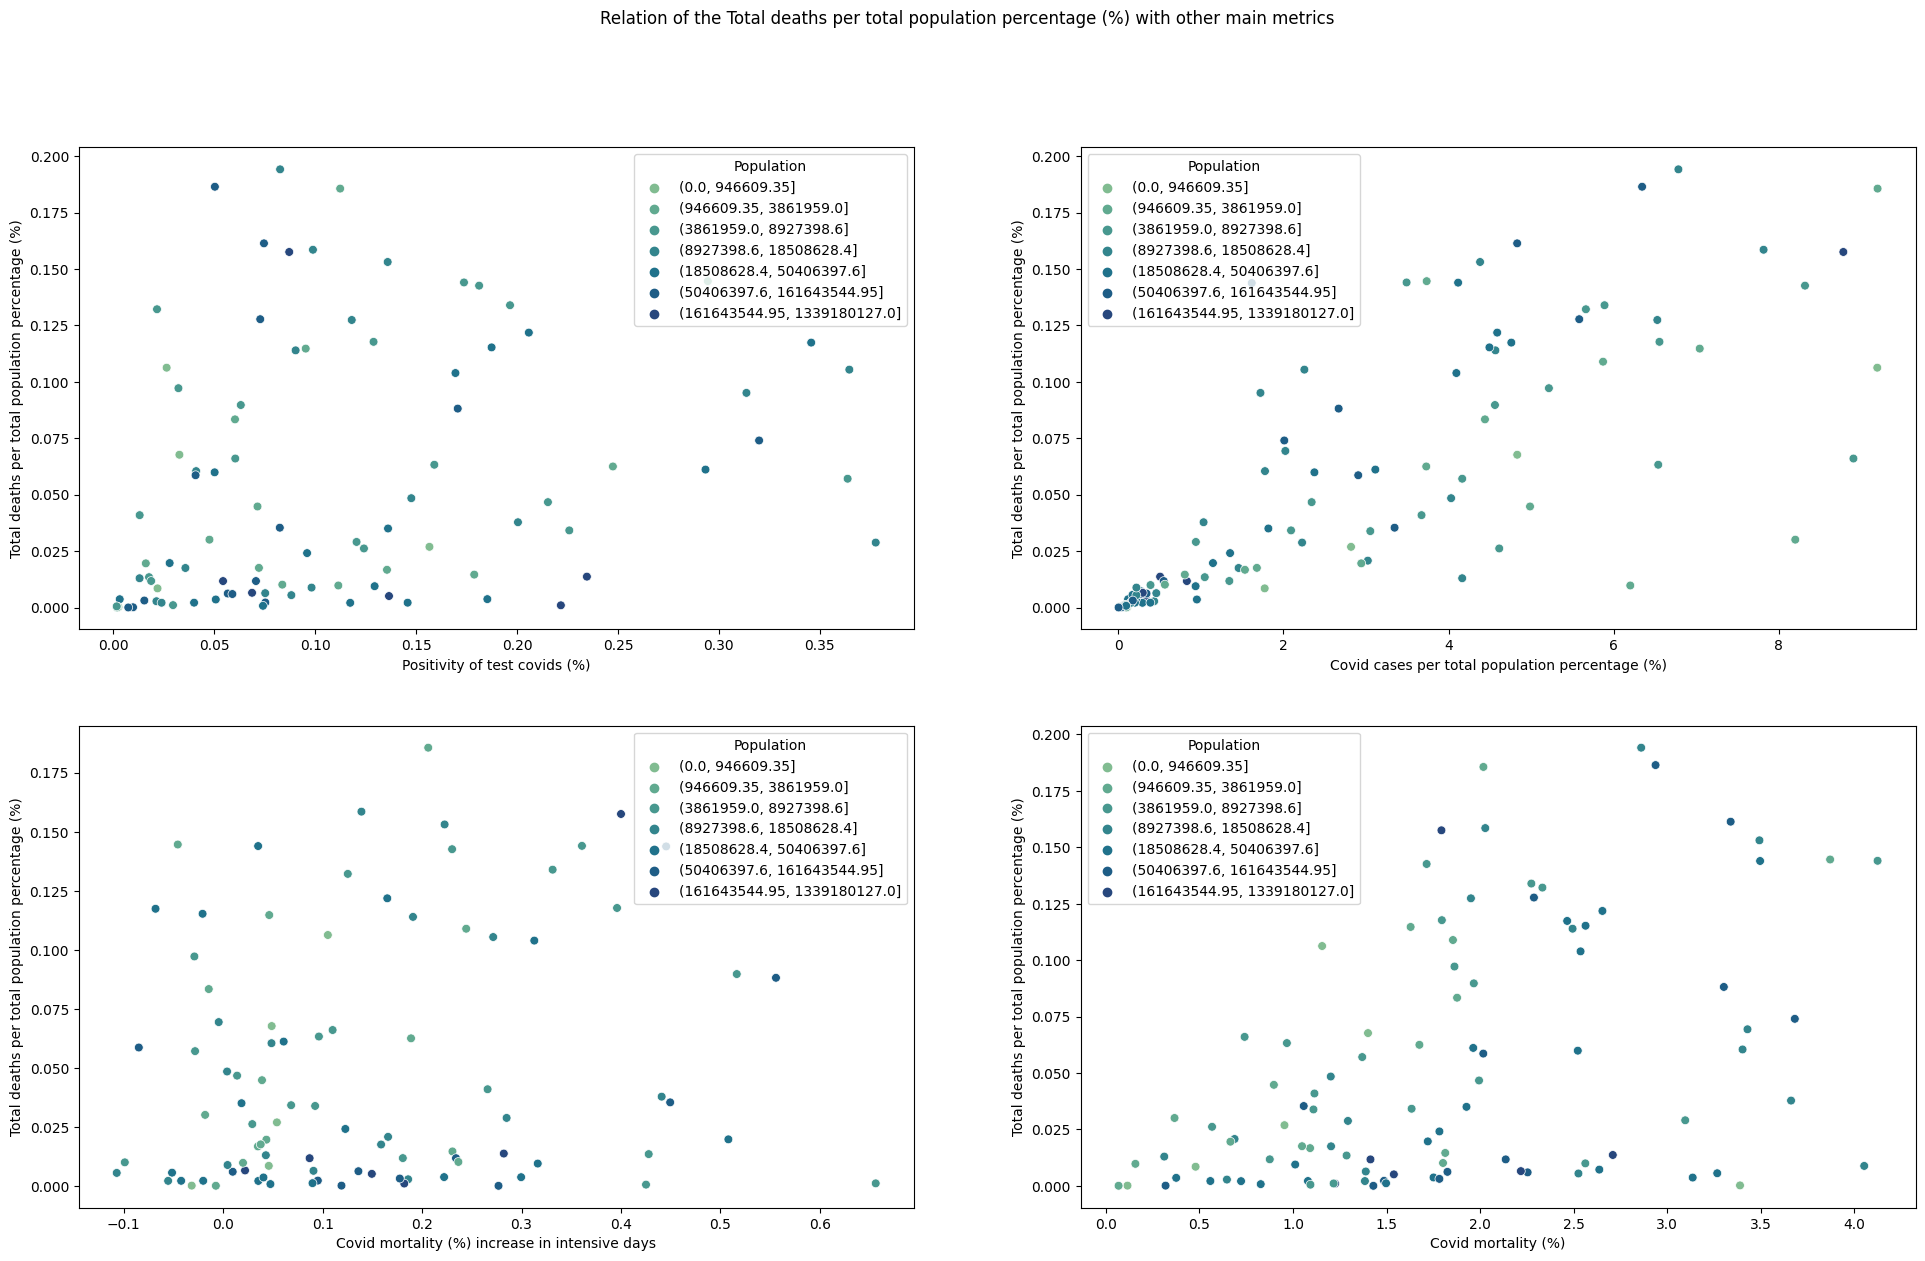

In [240]:
fig, axs = plt.subplots(2, 2 ,figsize=(23.7,13.77))
fig.suptitle('Relation of the Total deaths per total population percentage (%) with other main metrics')
x_columns=['Positivity of test covids (%)',
           'Covid cases per total population percentage (%)',     
            'Covid mortality (%) increase in intensive days',
            'Covid mortality (%)'
          ]
y_column= 'Total deaths per total population percentage (%)'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )                          

In [241]:
countries_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, Albania to Zimbabwe
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Continent                                         104 non-null    object 
 1   Latitude                                          104 non-null    float64
 2   Longitude                                         104 non-null    float64
 3   Average temperature per year                      104 non-null    int64  
 4   Hospital beds per 1000 people                     104 non-null    float64
 5   Medical doctors per 1000 people                   104 non-null    float64
 6   GDP/Capita                                        104 non-null    float64
 7   Population                                        104 non-null    int64  
 8   Median age                                        104 non-null    int64  
 9   Population aged

<Axes: xlabel='Total deaths per total population percentage (%)', ylabel='Average temperature per year'>

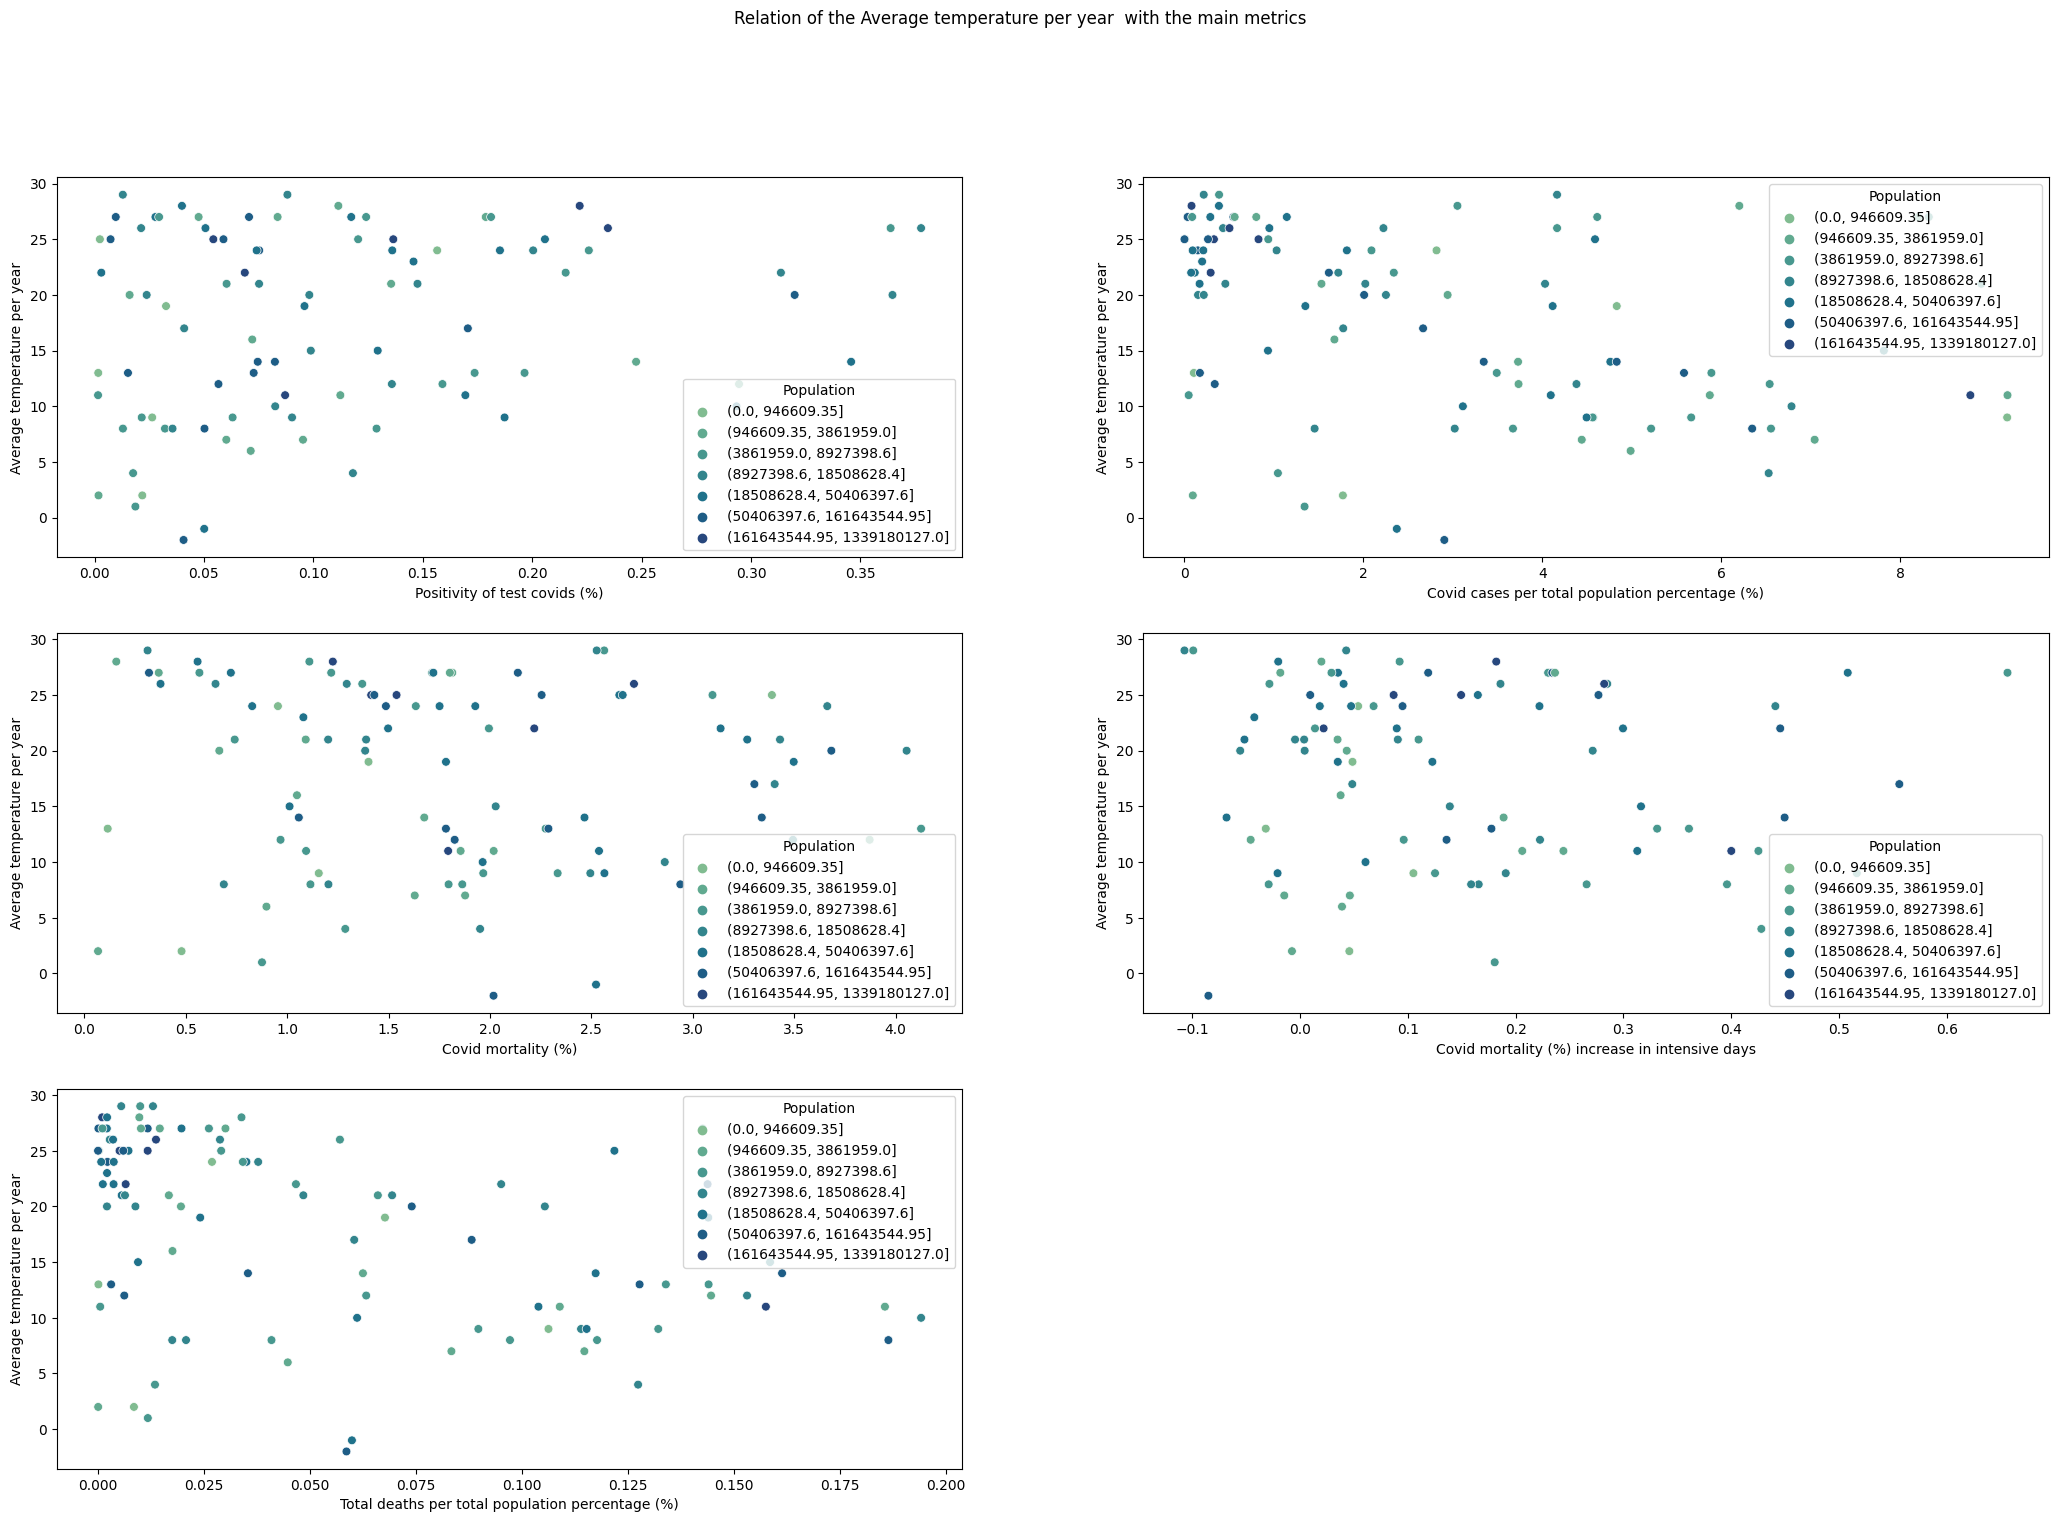

In [242]:
fig, axs = plt.subplots(3, 2 ,figsize=(25.7,16.77))
fig.suptitle('Relation of the Average temperature per year  with the main metrics')
x_columns=[
        'Positivity of test covids (%)',
        'Covid cases per total population percentage (%)',
        'Covid mortality (%)',
        'Covid mortality (%) increase in intensive days',
        'Total deaths per total population percentage (%)'
          ]
fig.delaxes(axs[2,1])          
y_column='Average temperature per year'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )     
sns.scatterplot(data=plot_data,
                x=x_columns[4],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[2,0]
                )                                                                      

<Axes: xlabel='Total deaths per total population percentage (%)', ylabel='Hospital beds per 1000 people'>

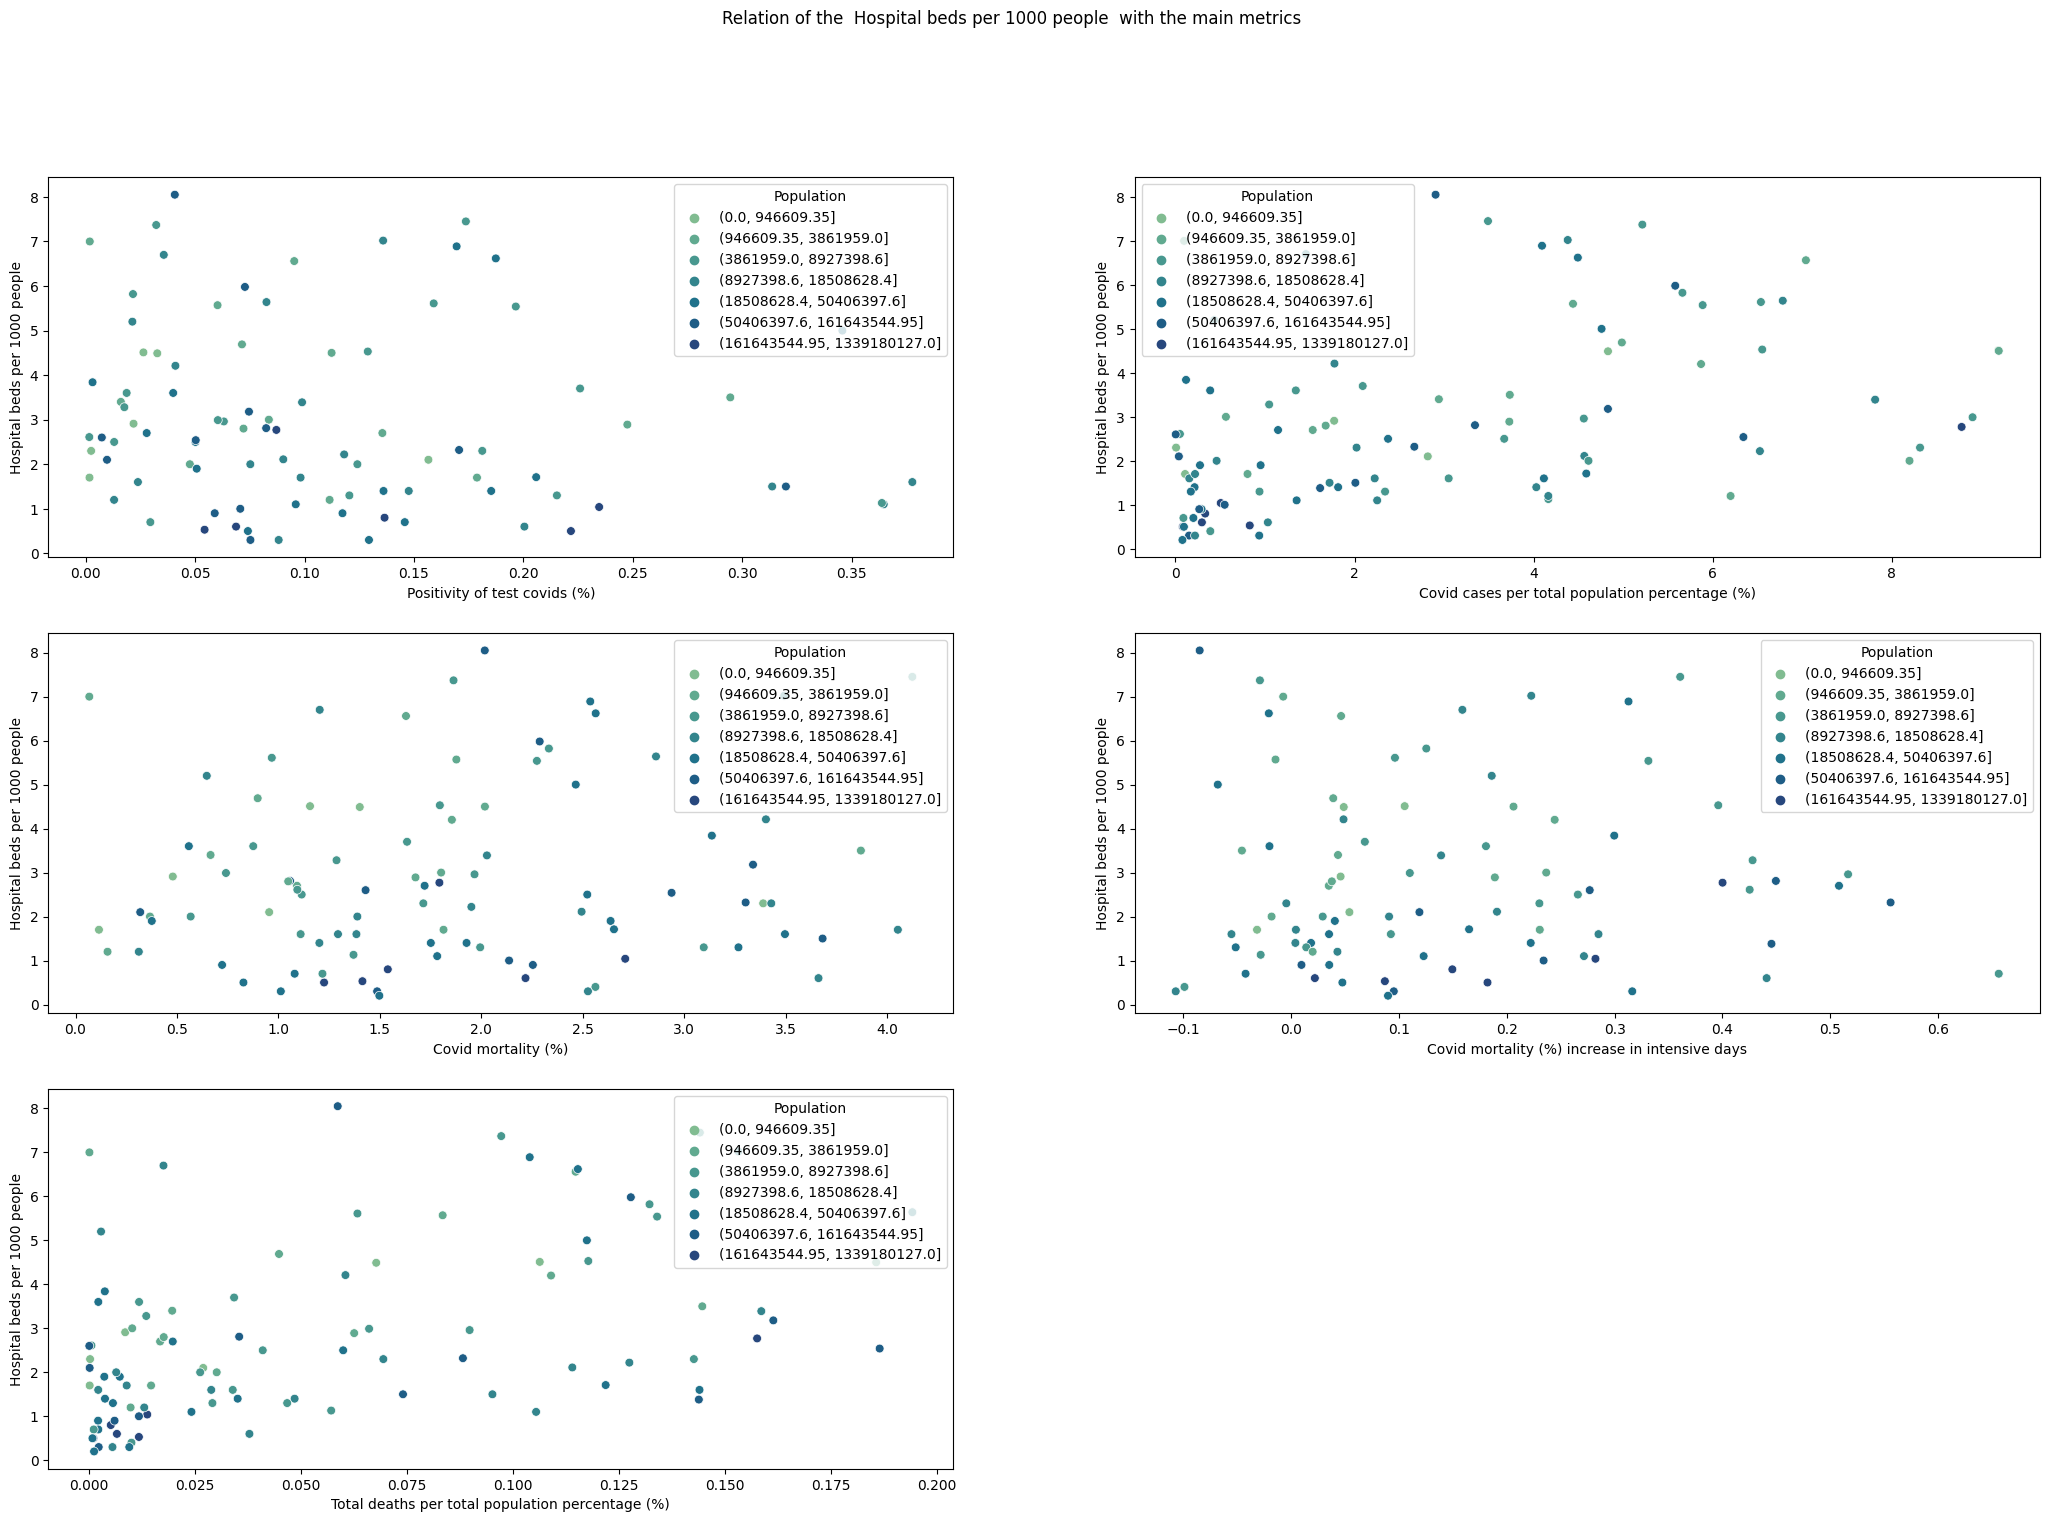

In [243]:
fig, axs = plt.subplots(3, 2 ,figsize=(25.7,16.77))
fig.suptitle('Relation of the  Hospital beds per 1000 people  with the main metrics')
x_columns=[
        'Positivity of test covids (%)',
        'Covid cases per total population percentage (%)',
        'Covid mortality (%)',
        'Covid mortality (%) increase in intensive days',
        'Total deaths per total population percentage (%)'
          ]
fig.delaxes(axs[2,1])          
y_column='Hospital beds per 1000 people'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )     
sns.scatterplot(data=plot_data,
                x=x_columns[4],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[2,0]
                )                                                                      

<Axes: xlabel='Total deaths per total population percentage (%)', ylabel='Medical doctors per 1000 people'>

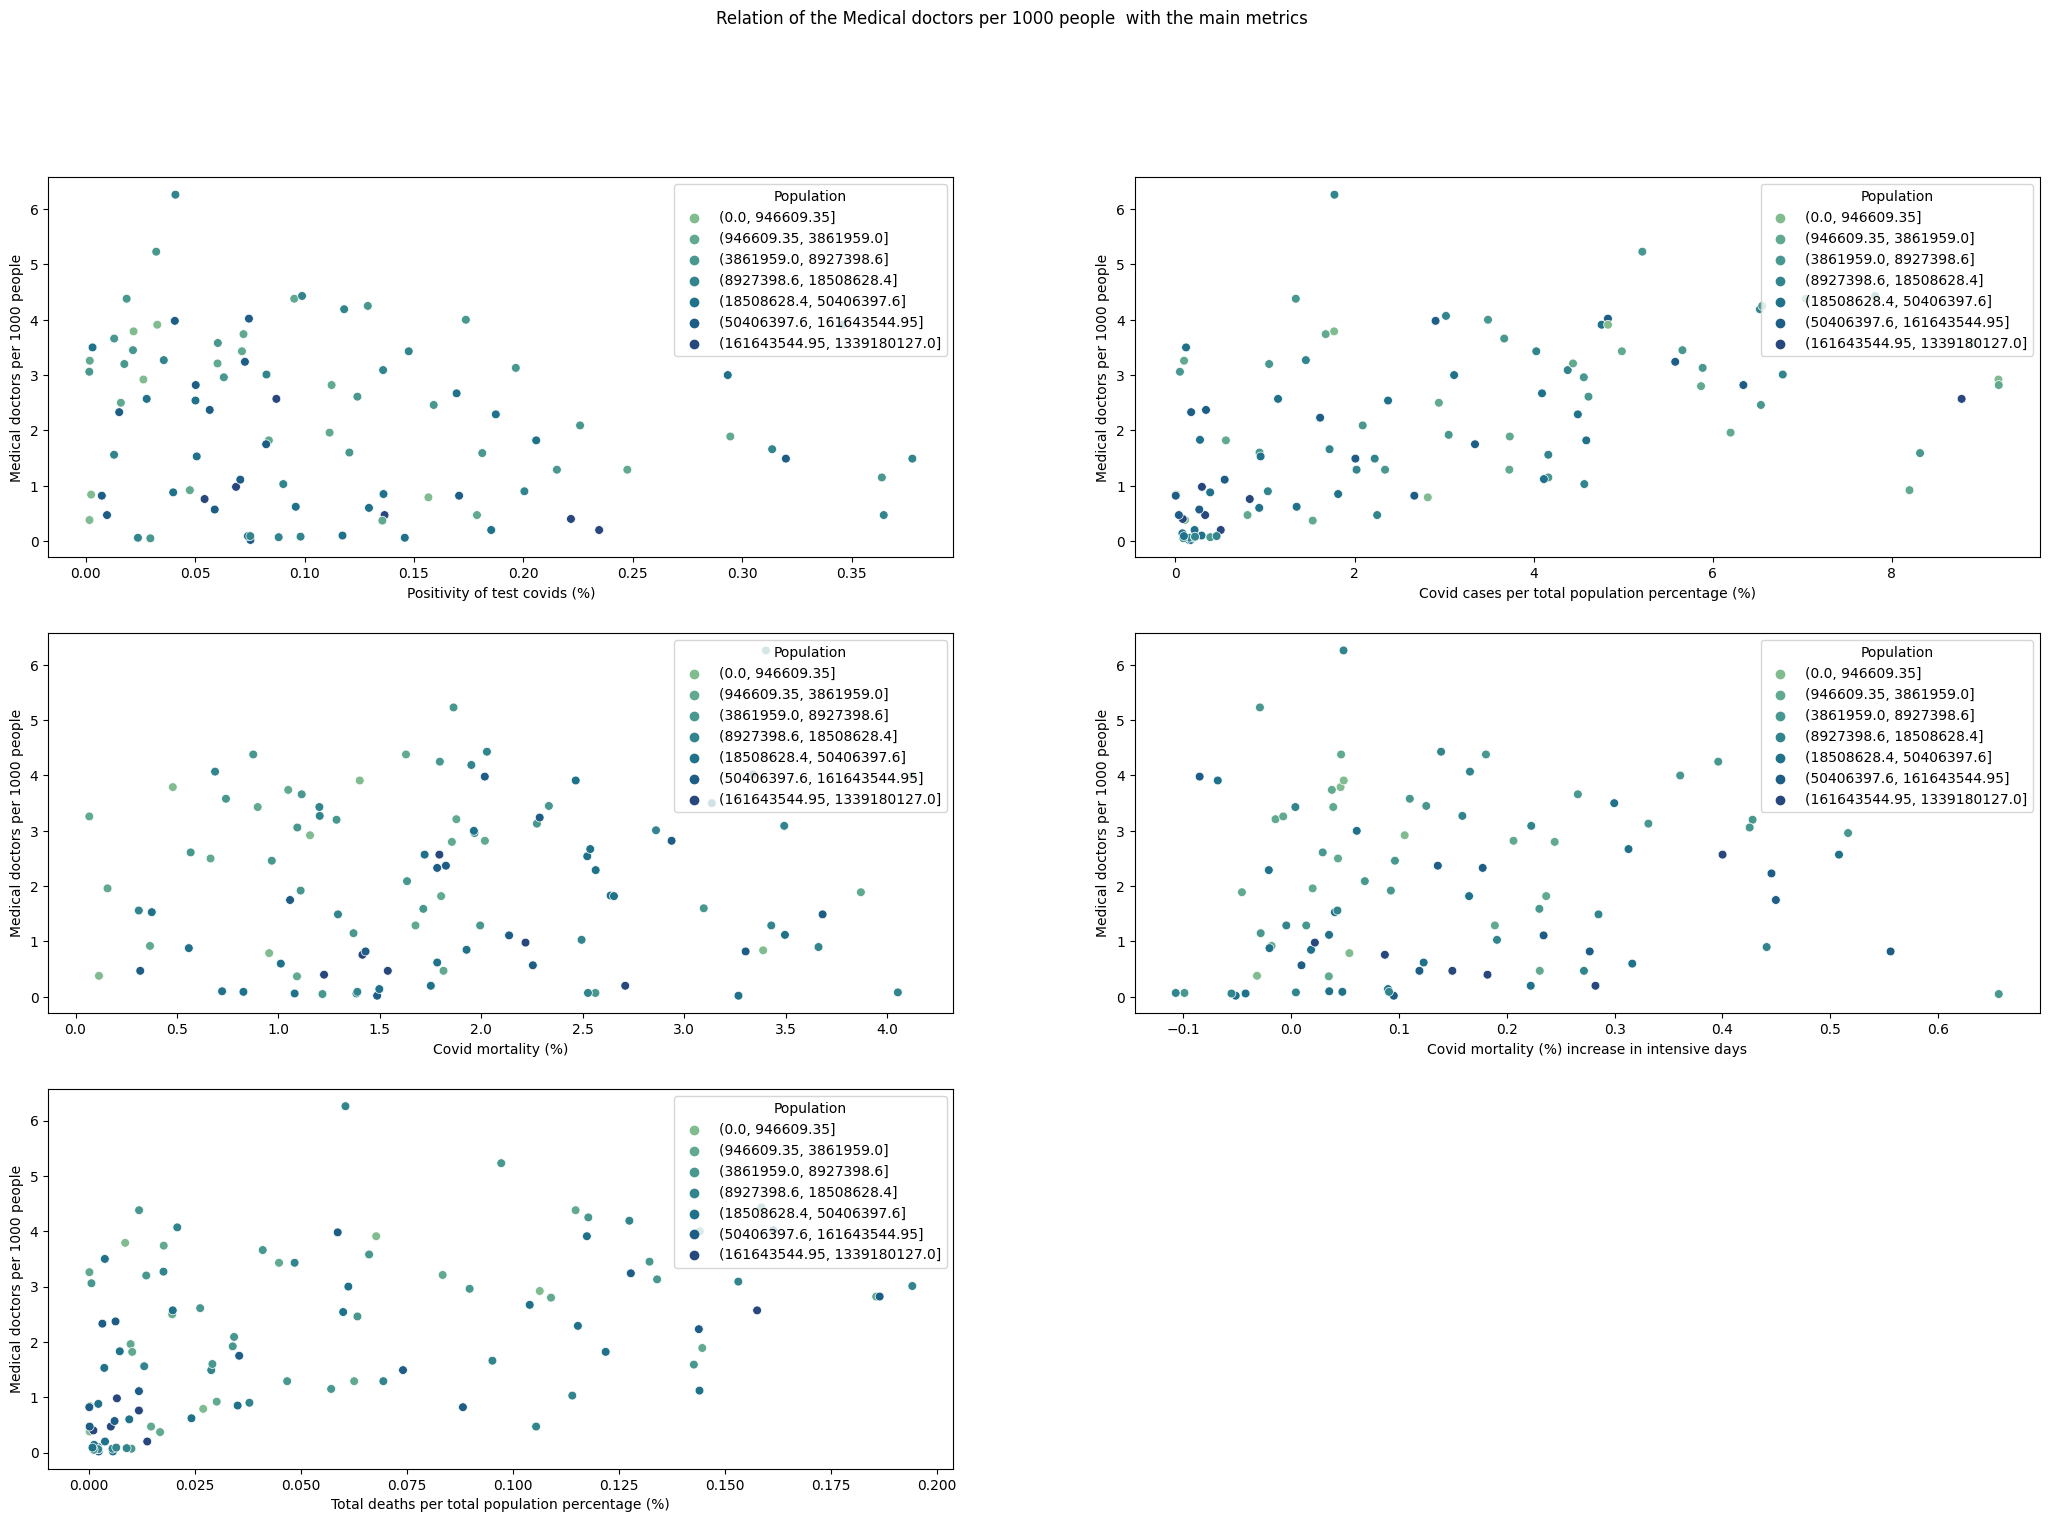

In [244]:
fig, axs = plt.subplots(3, 2 ,figsize=(25.7,16.77))
fig.suptitle('Relation of the Medical doctors per 1000 people  with the main metrics')
x_columns=[
        'Positivity of test covids (%)',
        'Covid cases per total population percentage (%)',
        'Covid mortality (%)',
        'Covid mortality (%) increase in intensive days',
        'Total deaths per total population percentage (%)'
          ]
fig.delaxes(axs[2,1])          
y_column='Medical doctors per 1000 people'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )     
sns.scatterplot(data=plot_data,
                x=x_columns[4],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[2,0]
                )                                                                      

<Axes: xlabel='Total deaths per total population percentage (%)', ylabel='GDP/Capita'>

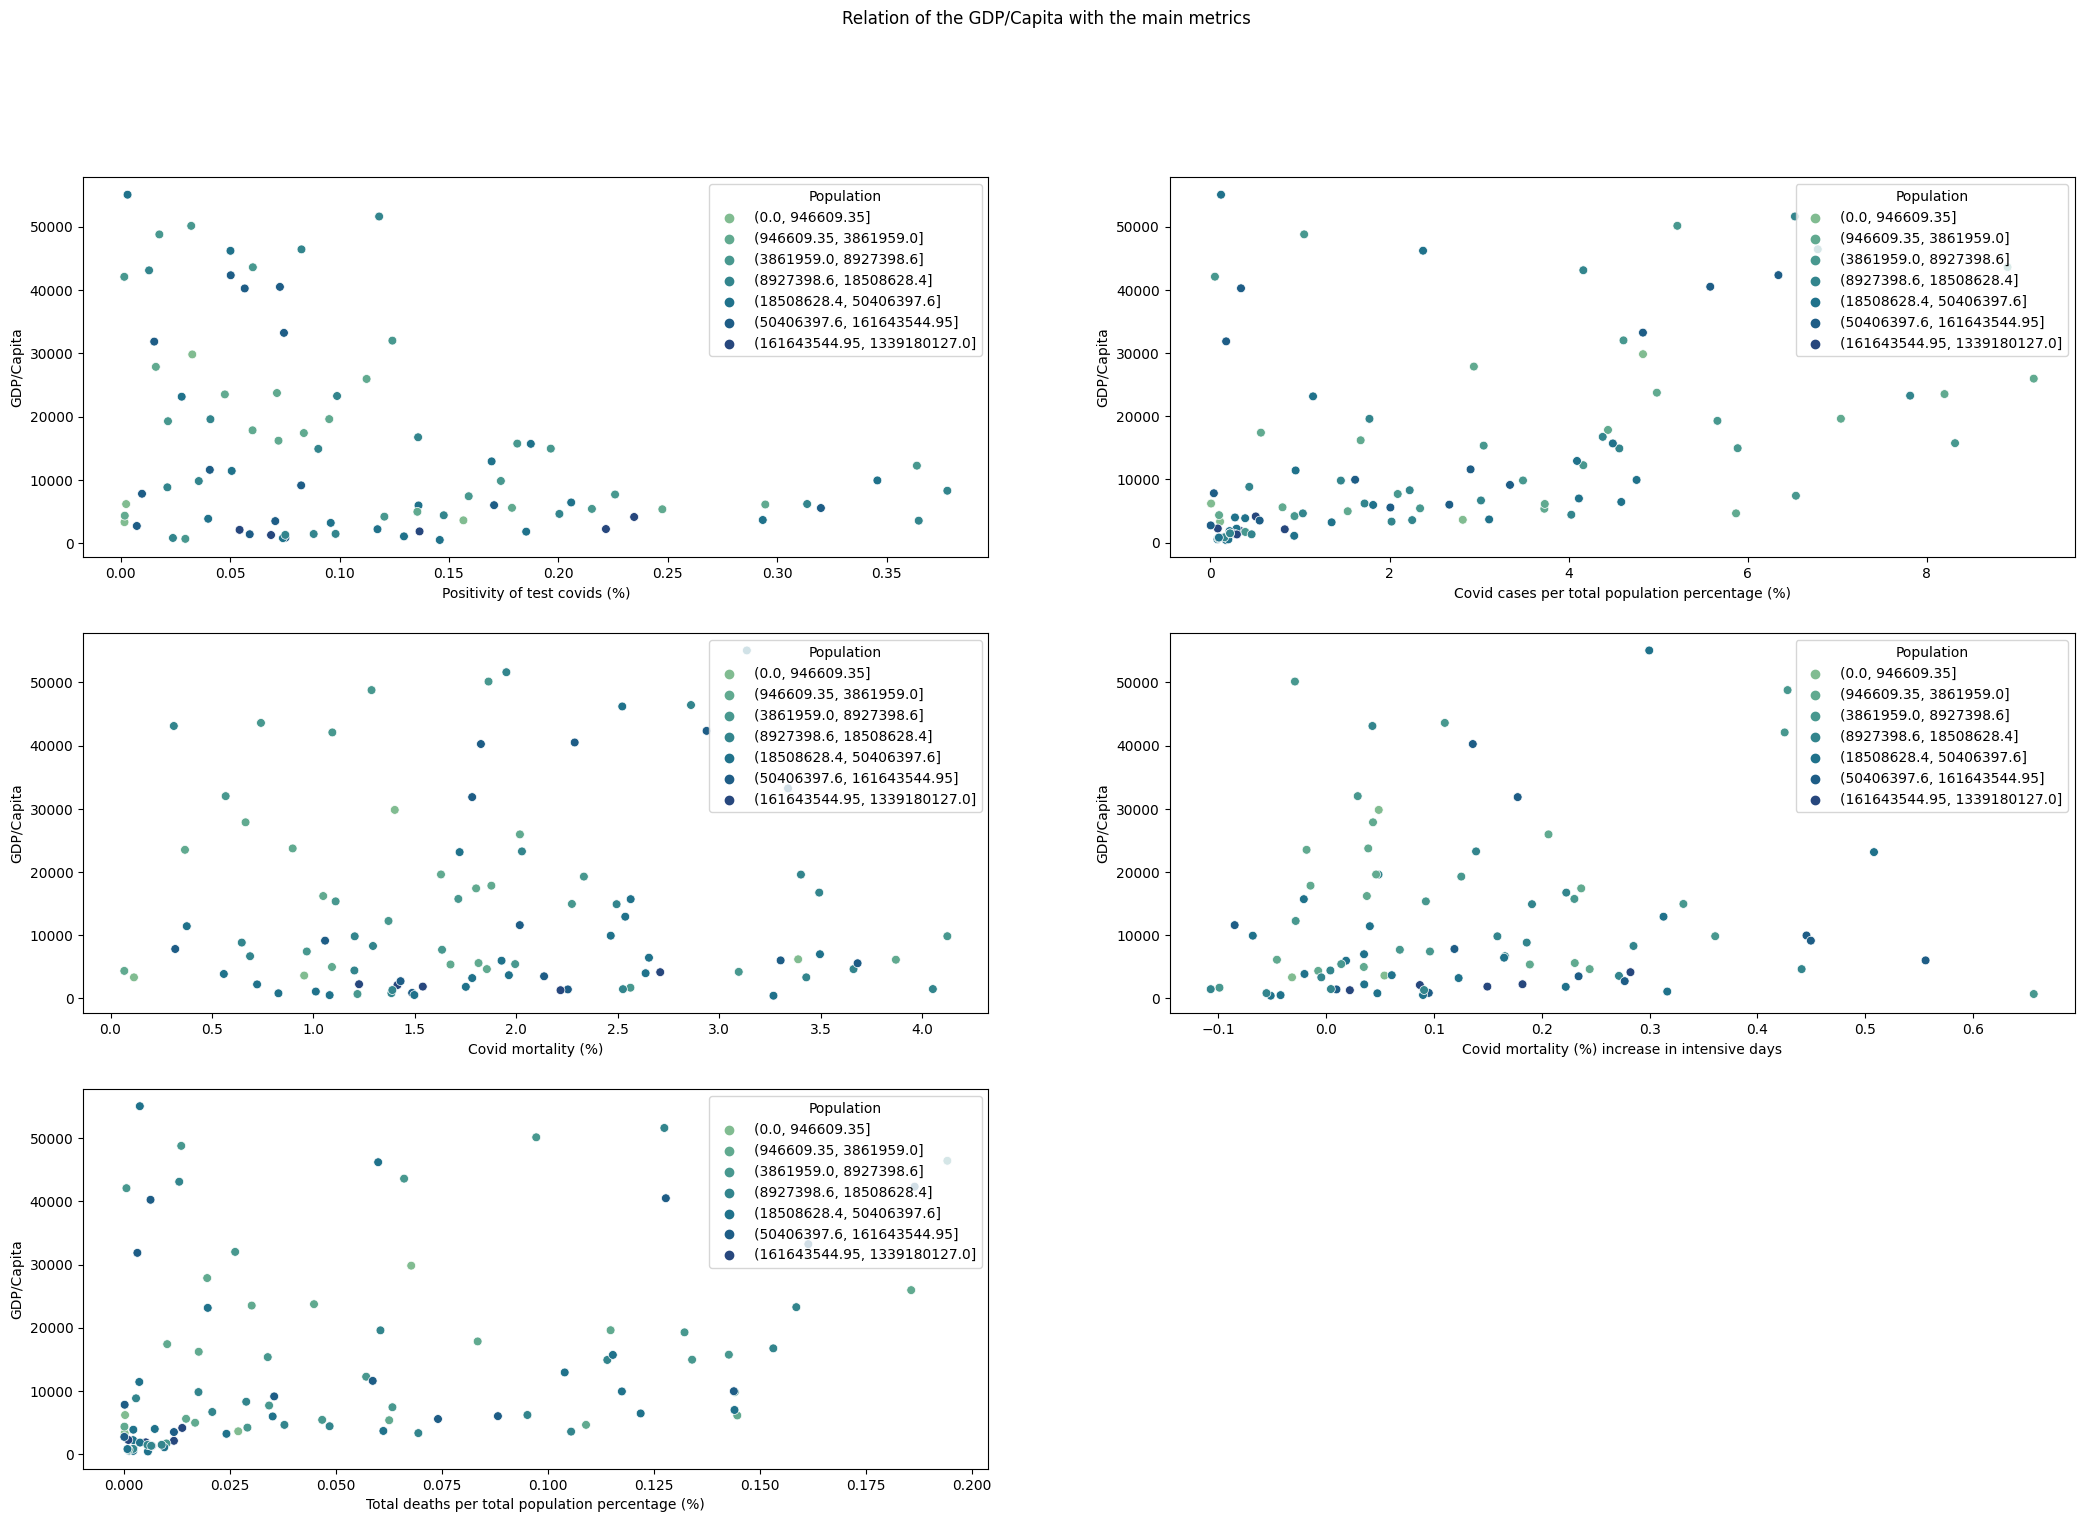

In [245]:
fig, axs = plt.subplots(3, 2 ,figsize=(25.7,16.77))
fig.suptitle('Relation of the GDP/Capita with the main metrics')
x_columns=[
        'Positivity of test covids (%)',
        'Covid cases per total population percentage (%)',
        'Covid mortality (%)',
        'Covid mortality (%) increase in intensive days',
        'Total deaths per total population percentage (%)'
          ]
fig.delaxes(axs[2,1])          
y_column='GDP/Capita'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )     
sns.scatterplot(data=plot_data,
                x=x_columns[4],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[2,0]
                )                                                                      

<Axes: xlabel='Total deaths per total population percentage (%)', ylabel='Population'>

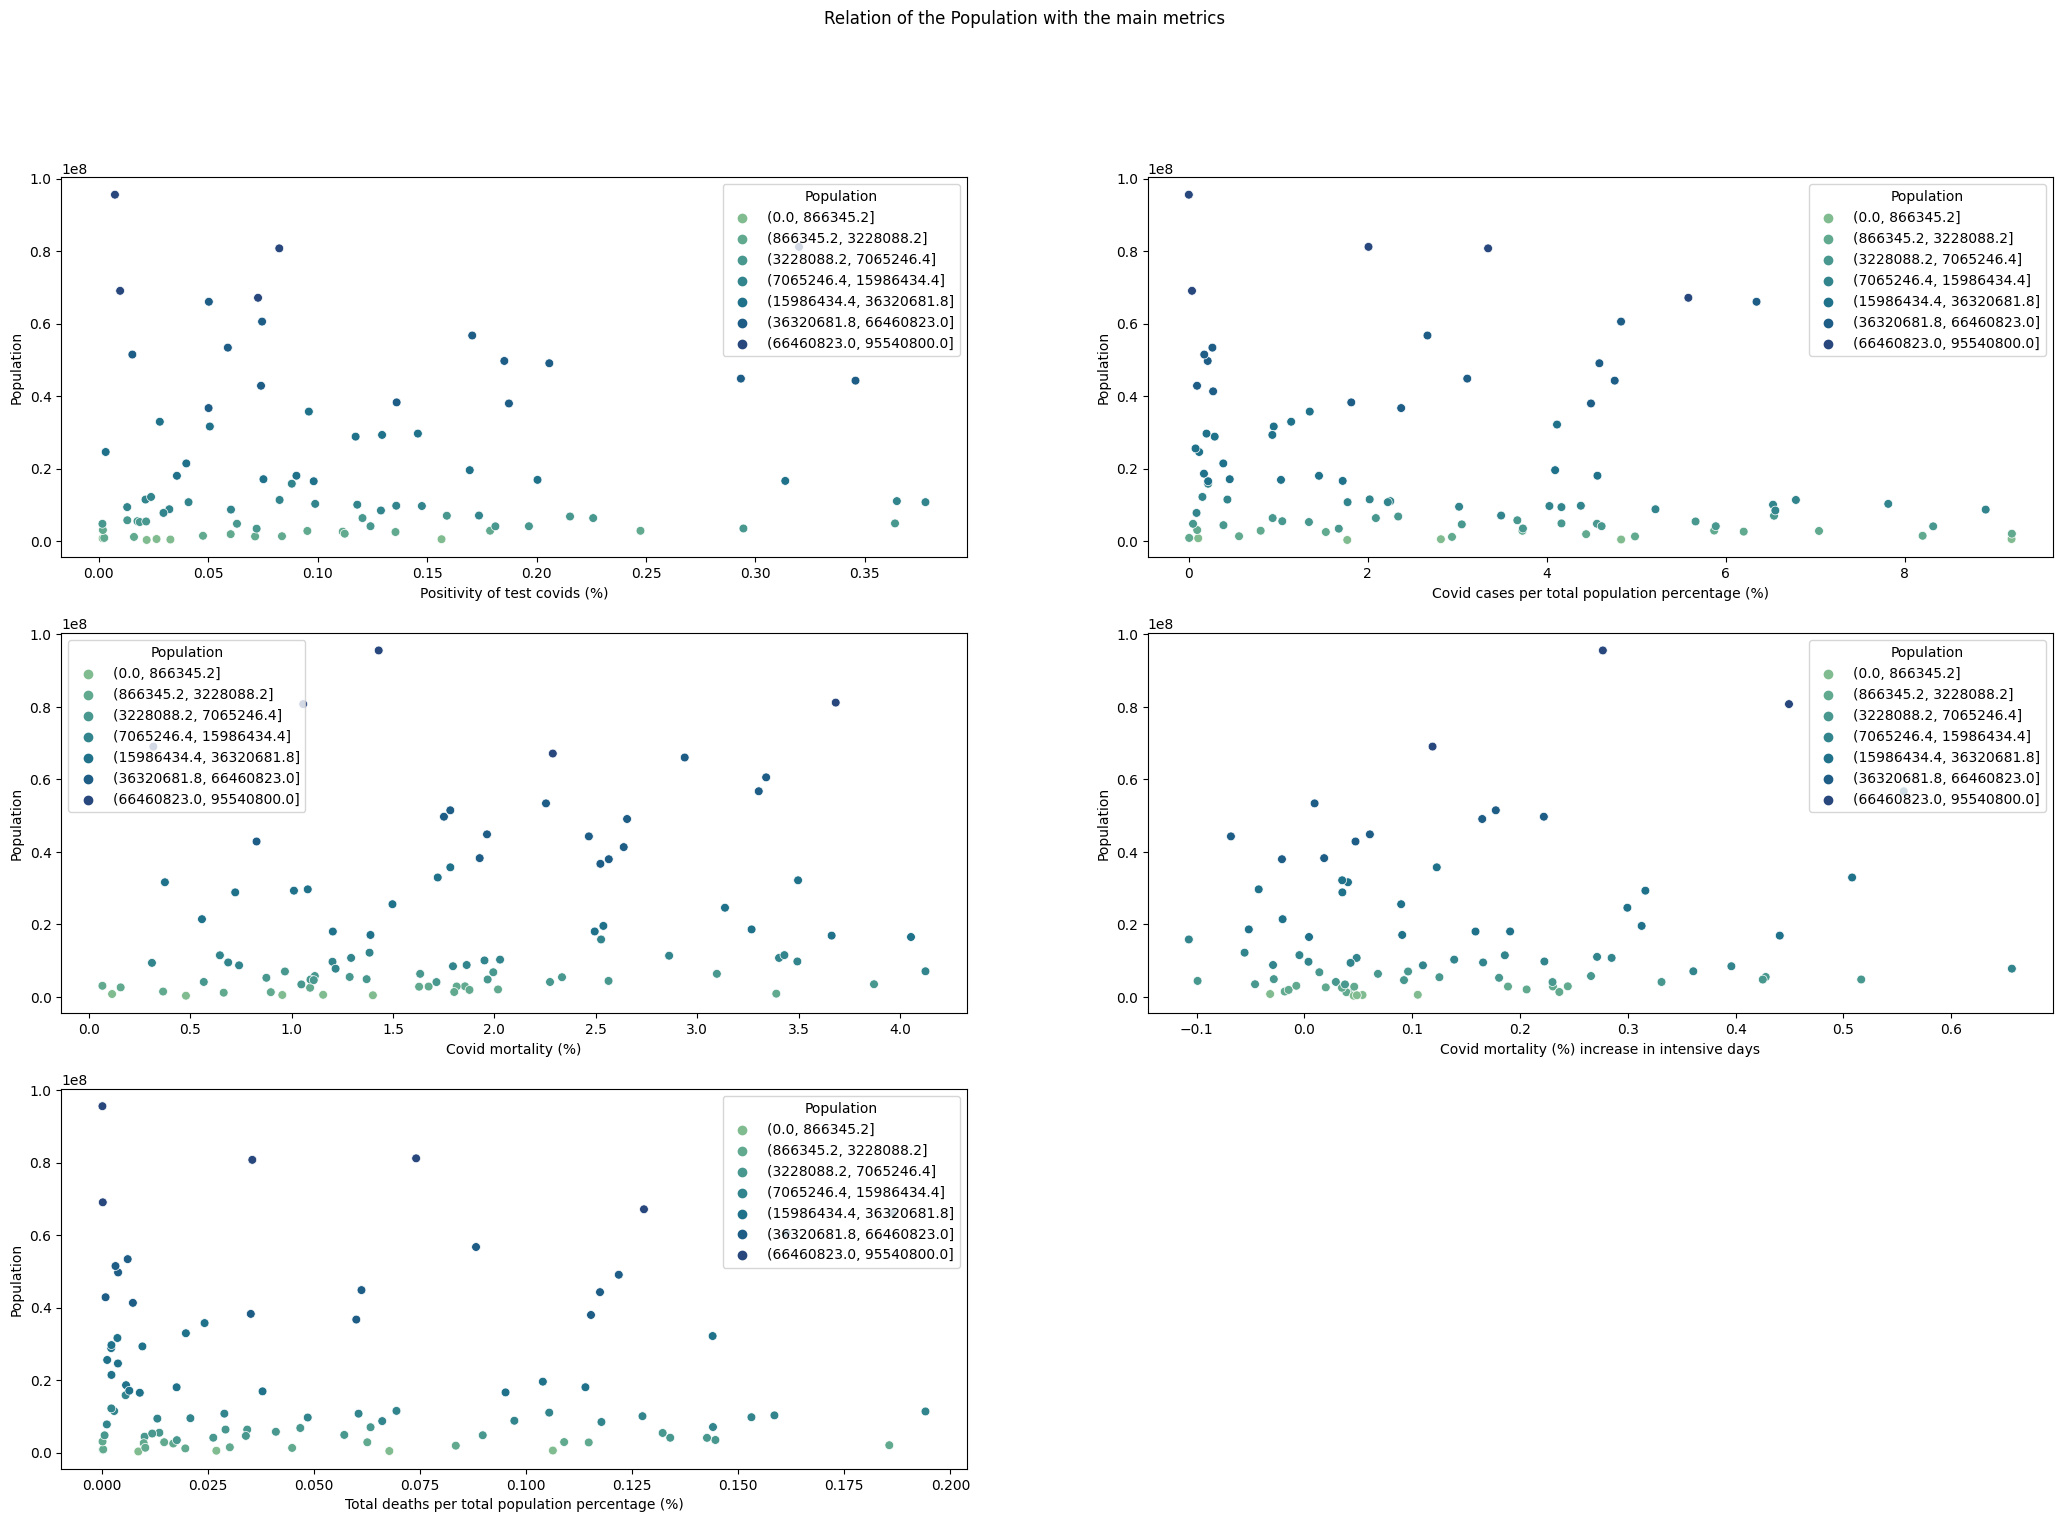

In [246]:
fig, axs = plt.subplots(3, 2 ,figsize=(25.7,16.77))
fig.suptitle('Relation of the Population with the main metrics')
x_columns=[
        'Positivity of test covids (%)',
        'Covid cases per total population percentage (%)',
        'Covid mortality (%)',
        'Covid mortality (%) increase in intensive days',
        'Total deaths per total population percentage (%)'
          ]
fig.delaxes(axs[2,1])          
y_column='Population'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )     
sns.scatterplot(data=plot_data,
                x=x_columns[4],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[2,0]
                )                                                                      

<Axes: xlabel='Total deaths per total population percentage (%)', ylabel='Median age'>

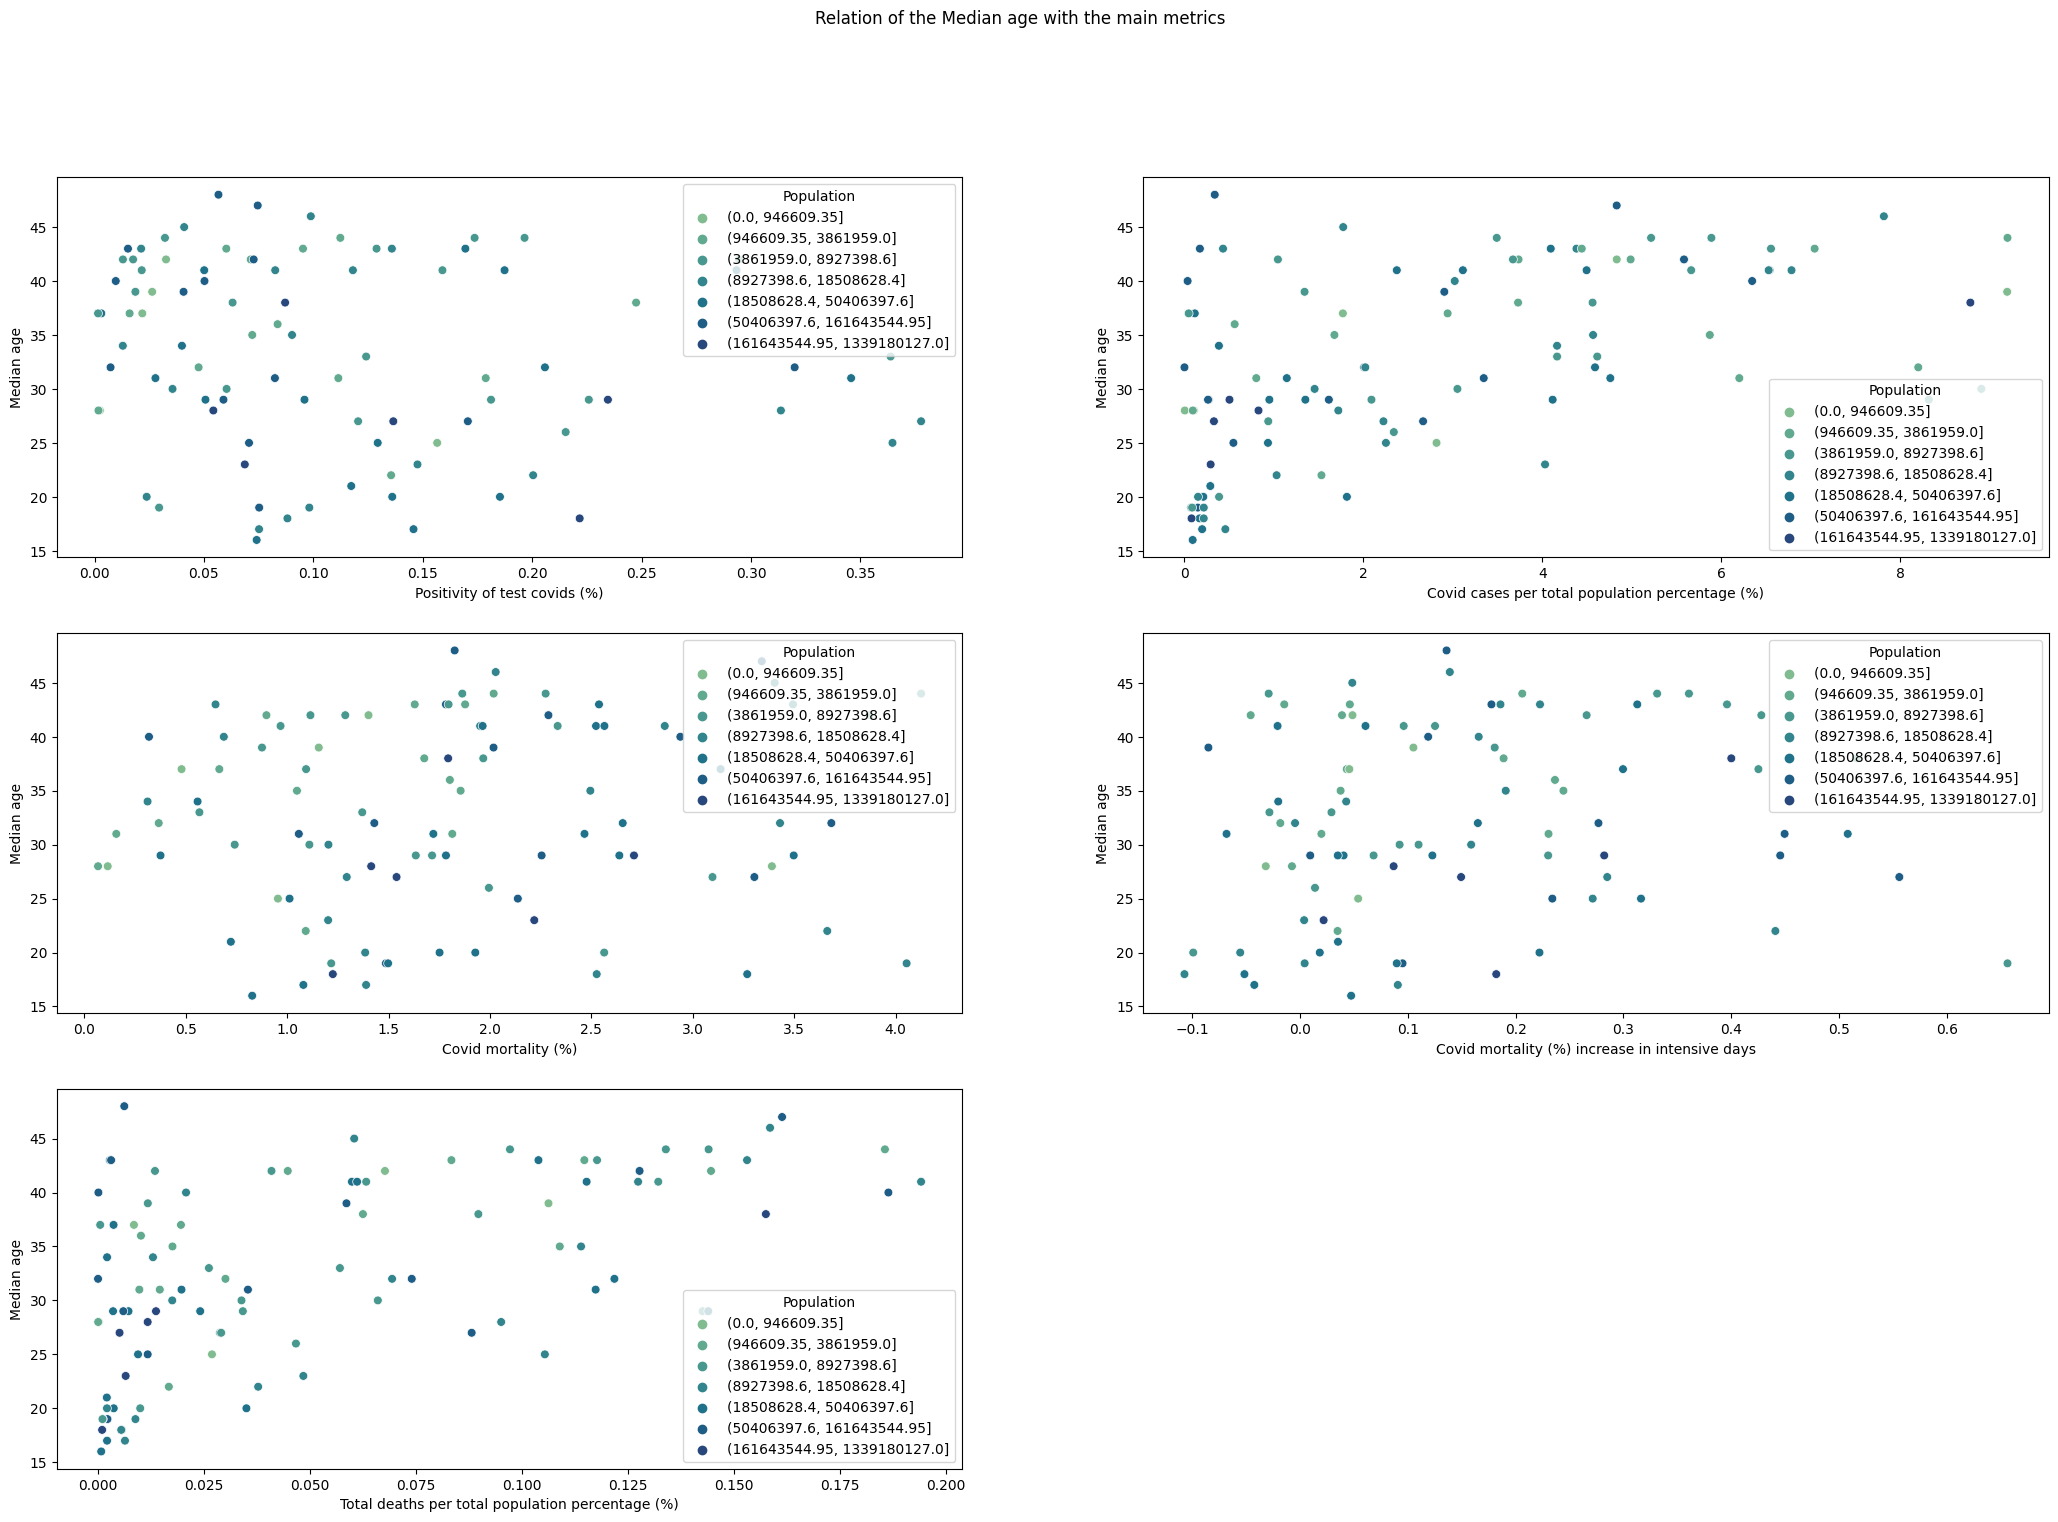

In [247]:
fig, axs = plt.subplots(3, 2 ,figsize=(25.7,16.77))
fig.suptitle('Relation of the Median age with the main metrics')
x_columns=[
        'Positivity of test covids (%)',
        'Covid cases per total population percentage (%)',
        'Covid mortality (%)',
        'Covid mortality (%) increase in intensive days',
        'Total deaths per total population percentage (%)'
          ]
fig.delaxes(axs[2,1])          
y_column='Median age'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )     
sns.scatterplot(data=plot_data,
                x=x_columns[4],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[2,0]
                )                                                                      

<Axes: xlabel='Total deaths per total population percentage (%)', ylabel='Population aged 65 and over (%)'>

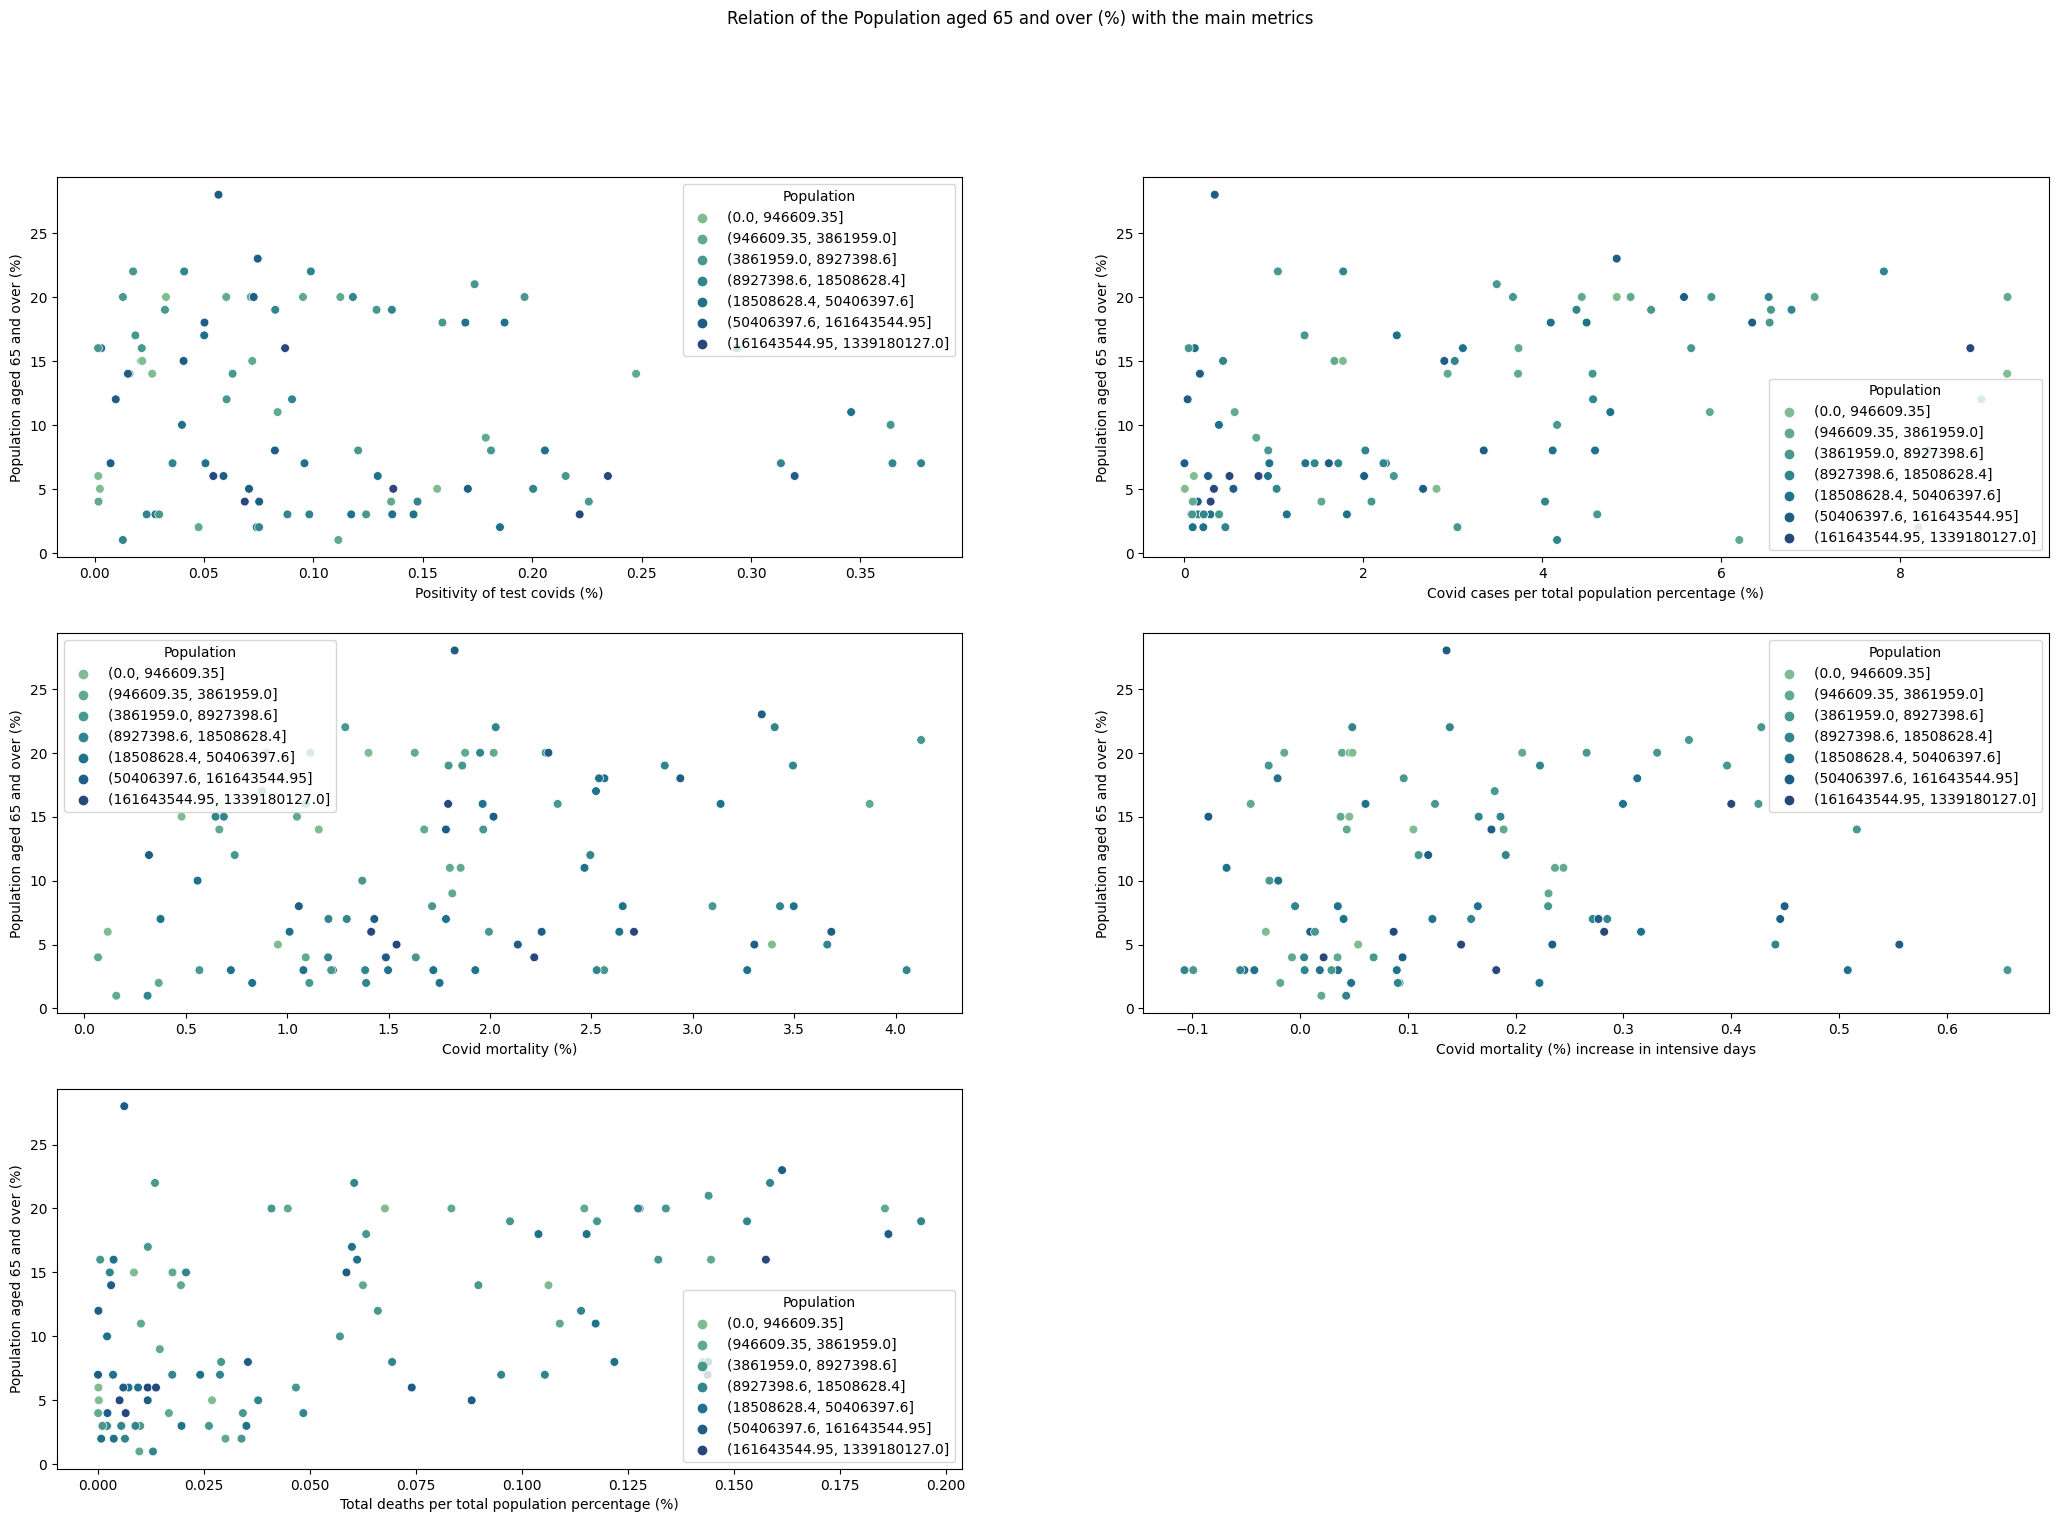

In [248]:
fig, axs = plt.subplots(3, 2 ,figsize=(25.7,16.77))
fig.suptitle('Relation of the Population aged 65 and over (%) with the main metrics')
x_columns=[
        'Positivity of test covids (%)',
        'Covid cases per total population percentage (%)',
        'Covid mortality (%)',
        'Covid mortality (%) increase in intensive days',
        'Total deaths per total population percentage (%)'
          ]
fig.delaxes(axs[2,1])          
y_column='Population aged 65 and over (%)'
hue_column='Population'          
plot_data=countries_stats.copy()  
for column in columns:
     plot_data=remove_outlier(plot_data,column)


plot_data=remove_outlier(plot_data,y_column)
hue_column_data=plot_data[hue_column]
hue_bins=HueDistrubition(hue_column_data)
sns.scatterplot(data=plot_data,
                x=x_columns[0],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,0]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[1],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[0,1]
                )
sns.scatterplot(data=plot_data,
                x=x_columns[2],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,0]
                ) 
sns.scatterplot(data=plot_data,
                x=x_columns[3],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[1,1]
                )     
sns.scatterplot(data=plot_data,
                x=x_columns[4],
                y=y_column,
                hue=hue_bins,
                palette=sns.color_palette("crest",n_colors=7),
                s=40,
                ax=axs[2,0]
                )                                                                      

In [249]:
countries_stats_filtered=countries_stats.drop(columns=['Continent','Latitude','Longitude','Mean daily tests per Mean daily cases ratio','Mean daily cases per Mean daily deaths','Total cases','Covid mortality per one thousand people'])
countries_stats_filtered.corr()


Average temperature per year  \
Average temperature per year                                           1.00000   
Hospital beds per 1000 people                                         -0.59417   
Medical doctors per 1000 people                                       -0.58375   
GDP/Capita                                                            -0.47635   
Population                                                             0.11363   
Median age                                                            -0.62080   
Population aged 65 and over (%)                                       -0.70429   
Mean daily tests                                                      -0.14221   
Mean daily cases                                                      -0.11911   
Mean daily deaths                                                     -0.12857   
Total tests                                                           -0.14039   
Total deaths                                                          -0.12955   
Total tests per total population percentage (%)                       -0.31563   
Covid cases per total population percentage (%)                       -0.37616   
Total deaths per total population percentage (%)                      -0.43013   
Covid mortality (%)                                                   -0.00529   
Covid mortality (%) increase in intensive days                        -0.01289   
Positivity of test covids (%)                                          0.09431   

                                                  Hospital beds per 1000 people  \
Average temperature per year                                           -0.59417   
Hospital beds per 1000 people                                           1.00000   
Medical doctors per 1000 people                                         0.60080   
GDP/Capita                                                              0.24712   
Population                                                             -0.12293   
Median age                                                              0.68826   
Population aged 65 and over (%)                                         0.66072   
Mean daily tests                                                        0.01043   
Mean daily cases                                                       -0.00467   
Mean daily deaths                                                      -0.01128   
Total tests                                                             0.00954   
Total deaths                                                           -0.01034   
Total tests per total population percentage (%)                         0.16470   
Covid cases per total population percentage (%)                         0.26377   
Total deaths per total population percentage (%)                        0.26875   
Covid mortality (%)                                                    -0.03911   
Covid mortality (%) increase in intensive days                         -0.05458   
Positivity of test covids (%)                                          -0.05303   

                                                  Medical doctors per 1000 people  \
Average temperature per year                                             -0.58375   
Hospital beds per 1000 people                                             0.60080   
Medical doctors per 1000 people                                           1.00000   
GDP/Capita                                                                0.52188   
Population                                                               -0.15150   
Median age                                                                0.77174   
Population aged 65 and over (%)                                           0.73784   
Mean daily tests                                                          0.07374   
Mean daily cases                                                          0.05181   
Mean daily deaths                                              

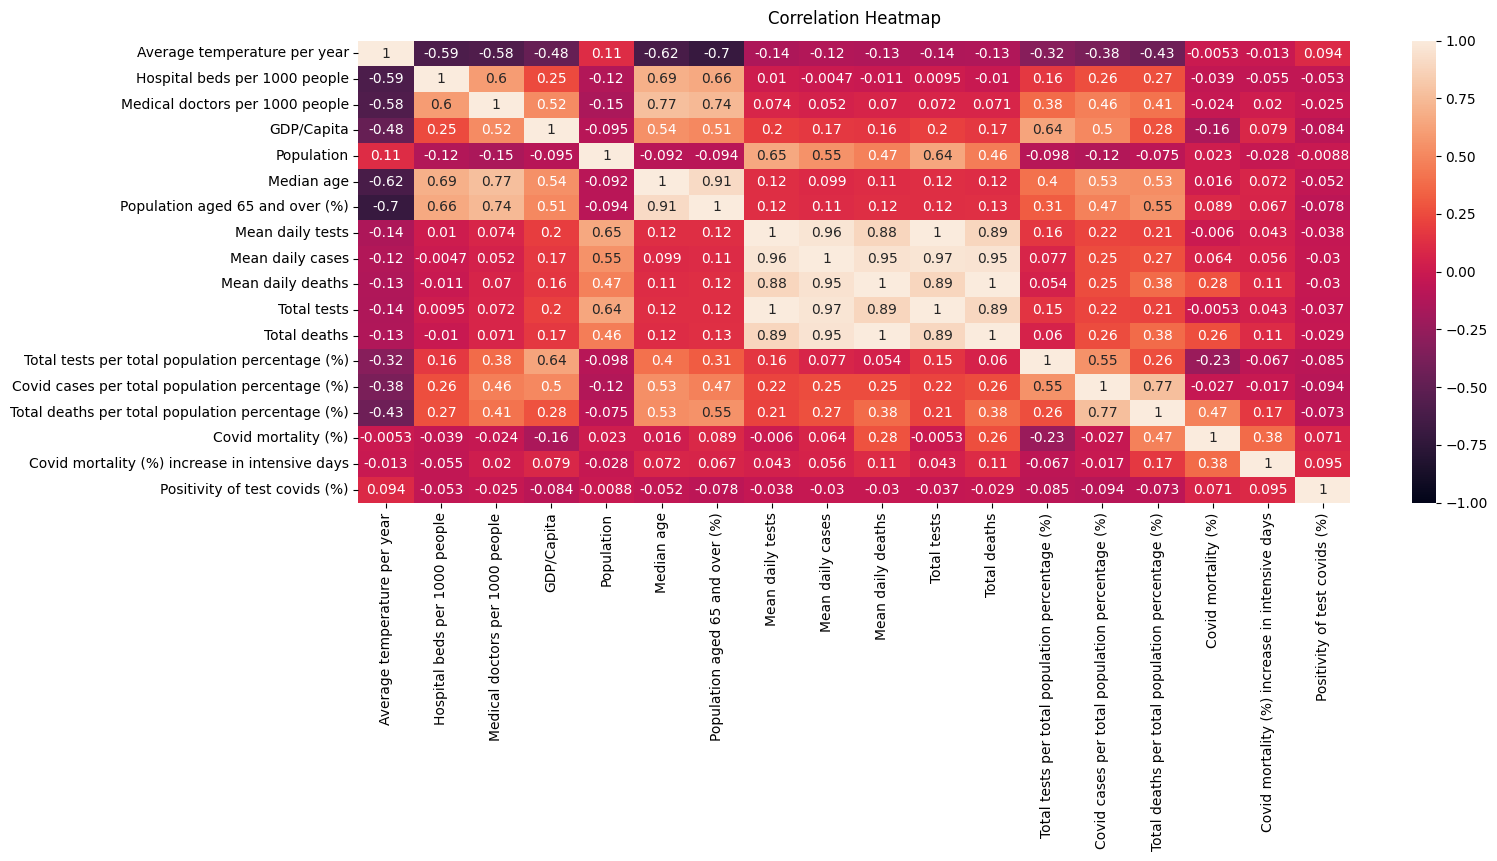

In [255]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(countries_stats_filtered.corr(), vmin=-1, vmax=1, annot=True)
 # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Clustering

In [250]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import NearestNeighbors 
from sklearn.decomposition import PCA

from psynlig import pca_explained_variance_bar

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
numberOfclusters=7

kmeans = KMeans(n_clusters=numberOfclusters)

In [ ]:

y = kmeans.fit_predict(countries_stats[['Covid cases per total population percentage (%)', 'Covid mortality (%)']])

C:\Users\Andreas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

countries_stats['Cluster'] = y

In [ ]:
countries_stats_sorted.head(50)

Country      Continent  Latitude  Longitude  \
28                  Fiji        Oceania    -16.58     179.41   
101              Vietnam           Asia     14.06     108.28   
65           New Zealand        Oceania    -40.90     174.89   
90              Thailand           Asia     15.87     100.99   
53            Madagascar         Africa    -18.77      46.87   
66               Nigeria         Africa      9.08       8.68   
4              Australia        Oceania    -25.27     133.78   
91                  Togo         Africa      8.62       0.82   
95                Uganda         Africa      1.37      32.29   
59              Mongolia           Asia     46.86     103.85   
10                Bhutan           Asia     27.51      90.43   
54                Malawi         Africa    -13.25      34.30   
27              Ethiopia         Africa      9.14      40.49   
79                Rwanda         Africa     -1.94      29.87   
86           South Korea           Asia     35.91     127.77   
103             Zimbabwe         Africa    -19.02      29.15   
81               Senegal         Africa     14.50     -14.45   
61            Mozambique         Africa    -18.67      35.53   
47                 Kenya         Africa     -0.02      37.91   
62               Myanmar           Asia     21.91      95.96   
1                Algeria         Africa     28.03       1.66   
69              Pakistan           Asia     30.38      69.35   
31                 Ghana         Africa      7.95      -1.02   
7             Bangladesh           Asia     23.68      90.36   
44                 Japan           Asia     36.20     138.25   
57            Mauritania         Africa     21.01     -10.94   
87             Sri Lanka           Asia      7.87      80.77   
20                  Cuba  North America     21.52     -77.78   
102               Zambia         Africa    -13.13      27.85   
37             Indonesia           Asia     -0.79     113.92   
73           Philippines           Asia     12.88     121.77   
92   Trinidad and Tobago  North America     10.69     -61.22   
43               Jamaica  North America     18.11     -77.30   
36                 India           Asia     20.59      78.96   
25           El Salvador  North America     13.79     -88.90   
64                 Nepal           Asia     28.39      84.12   
55              Malaysia           Asia      4.21     101.98   
33             Guatemala  North America     15.78     -90.23   
29               Finland         Europe     61.92      25.75   
80          Saudi Arabia           Asia     23.89      45.08   
60               Morocco         Africa     31.79      -7.09   
67                Norway         Europe     60.47       8.47   
46            Kazakhstan           Asia     48.02      66.92   
58                Mexico  North America     23.63    -102.55   
63               Namibia         Africa    -22.96      18.49   
24               Ecuador  South America     -1.83     -78.18   
100              Uruguay  South America    -32.52     -55.77   
32                Greece         Europe     39.07      21.82   
35               Iceland         Europe     64.96     -19.02   
39                  Iraq           Asia     33.22      43.68   

     Average temperature per year  Hospital beds per 1000 people  \
28                             25                           2.30   
101                            25                           2.60   
65                             11                           2.61   
90                             27                           2.10   
53                             22                           0.20   
66                             28                           0.50   
4                              22                           3.84   
91                             27                           0.70   
95                             24                           0.50   
59                              2                           7.00   
10  

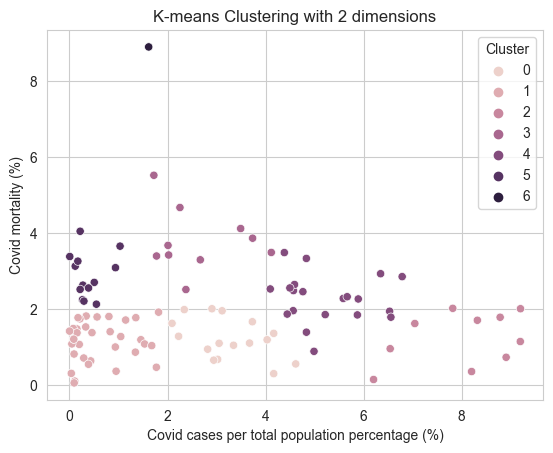

In [ ]:

sns.scatterplot(x="Covid cases per total population percentage (%)", y="Covid mortality (%)", hue=countries_stats['Cluster'], data=countries_stats)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
for i in range(numberOfclusters):
    print('Those countries are contained in cluster ',i)
    print(countries_stats[countries_stats['Cluster']==i])

Those countries are contained in cluster  0
                 Country      Continent  Latitude  Longitude  \
0                Albania         Europe     41.15      20.17   
8                Belarus         Europe     53.71      27.95   
15            Cape Verde         Africa     16.00     -24.01   
18            Costa Rica  North America      9.75     -83.75   
21                Cyprus         Europe     35.13      33.43   
22               Denmark         Europe     56.26       9.50   
23    Dominican Republic  North America     18.74     -70.16   
45                Jordan           Asia     30.59      36.24   
48                Kuwait           Asia     29.31      47.48   
50                 Libya         Africa     26.34      17.23   
68                  Oman           Asia     21.51      55.92   
71              Paraguay  South America    -23.44     -58.44   
78                Russia           Asia     61.52     105.32   
94                Turkey           Asia     38.96      35.24

In [ ]:
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours